## Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data:

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

Steps to be followed:

1.Data Cleaning 

2.Exploratory Data Analysis

3.Data preparation for model building

4.Model building

5.Model Evalution


### Step 1:Data Cleaning

In [1]:
#Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the data and importing the lead dataset 'lead_df'
lead_df = pd.read_csv("C:/Users/seeth/Downloads/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")

In [4]:
#Checking the data of the data frame 
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Shape of the dataframe
lead_df.shape

(9240, 37)

In [6]:
#Checking the datatypes of the columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Describing the data
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Checking for the null values in the dataset
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Here, there are many columns that has missing values .So in order to deal with the missing values we have first find the percentage of missing values and then drop the columns with more percentage of missing values.

In [9]:
#Finding the percentage of null values
round(lead_df.isnull().sum()/len(lead_df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

By this we know that there are few columns that have higher percentage of missing values, we can drop the columns with percentage of  missing values greater than 40%.

In [10]:
#Dropping the columns with missing values percentage greater than 40%
lead_df = lead_df.drop(columns = ['Asymmetrique Activity Index','Asymmetrique Profile Index',
                                  'Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'])

In [11]:
#Checking the dataset after droppping the columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
#Checking the missing values after dropping the columns
round(lead_df.isnull().sum()/len(lead_df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

###  Dealing with missing values

Here, we are replacing the missing values with appropriate values based on the visualization of each column which have missing values.


#### 1.Column: 'Tags' with 36% missing values

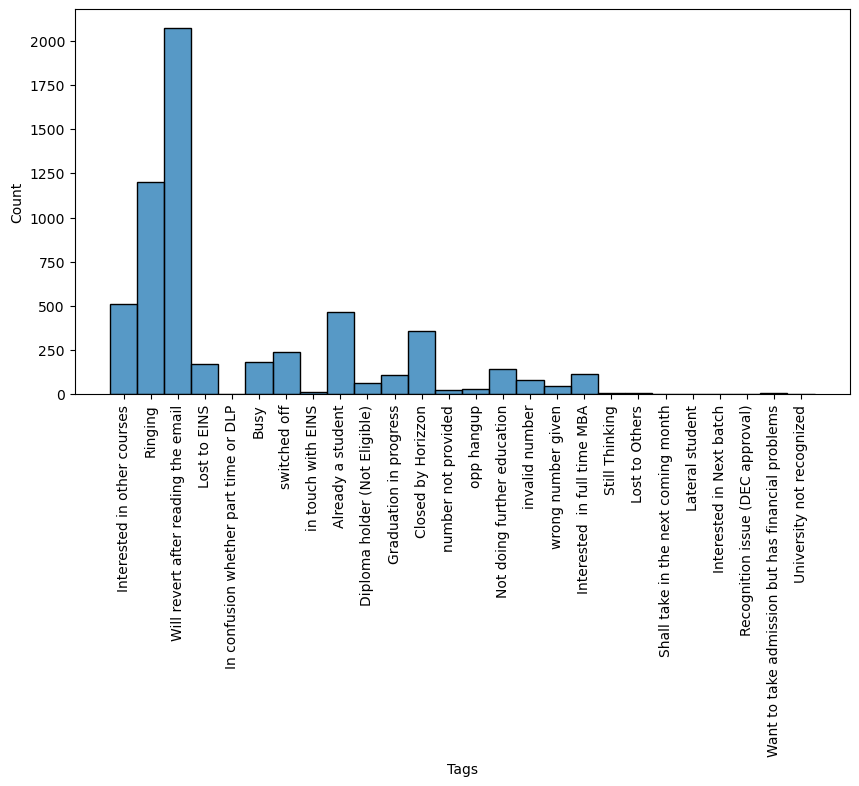

In [13]:
#analysing the column 'Tags' which has 36% of missing values
#Visualizing the 'Tags' column
plt.figure(figsize=(10,5))
sns.histplot(lead_df['Tags'])
plt.xticks(rotation=90)
plt.show()

Since the most of the values of the column are 'Will revert after reading the email'.we can replace the missing values with this value.

In [14]:
#Imputing the missing values with 'Will revert after reading the email' in 'Tags' column
lead_df['Tags'] = lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

In [15]:
#Checking the missing values of tags column
lead_df.Tags.isnull().sum()

0

#### 2.Column: 'What is your current occupation' with 29% missing values

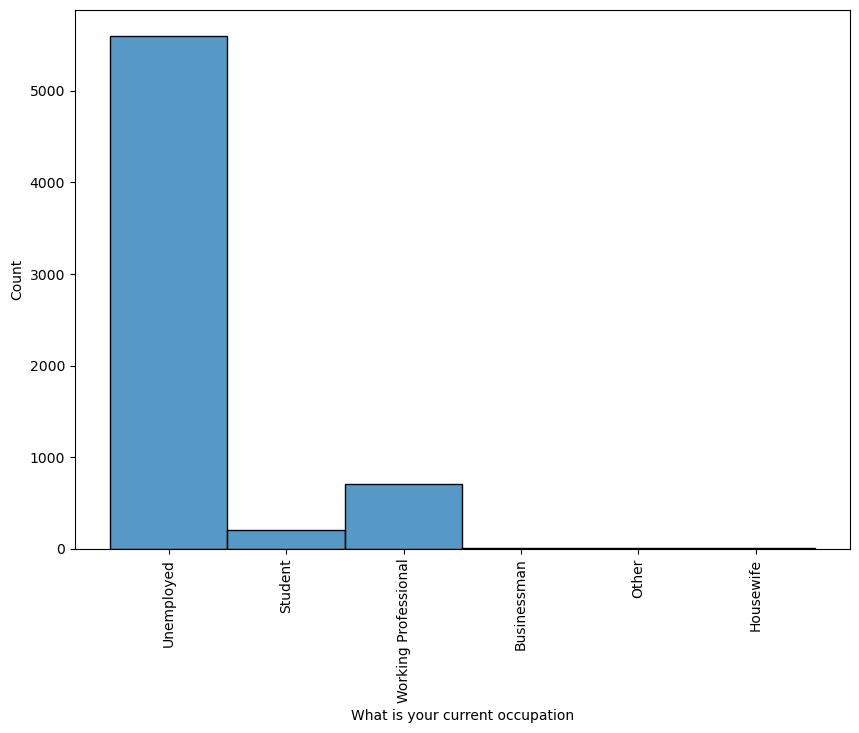

In [16]:
#analysing the column 'What is your current occupation' which has 29% of missing values
#Visualizing the 'What is your current occupation' column
plt.figure(figsize=(10,7))
sns.histplot(lead_df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

Since the most of the values of the column are 'Unemployed'.we can replace the missing values with this value.

In [17]:
#Imputing the missing values with 'Unemployed' in 'What is your current occupation' column
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan,'Unempolyed')

In [18]:
#Checking the missing values of what is your current occupation column
lead_df['What is your current occupation'].isnull().sum()

0

#### 3.Column: 'What matters most to you in choosing a course' with 29% missing values

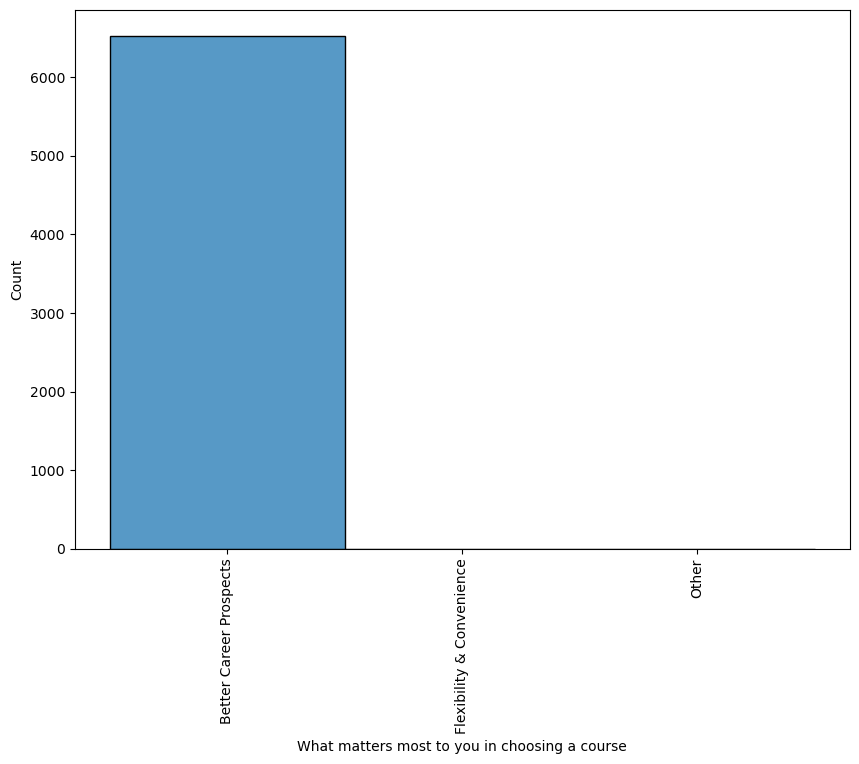

In [19]:
#analysing the column 'What matters most to you in choosing a course' which has 29% of missing values
#Visualizing the 'What matters most to you in choosing a course' column
plt.figure(figsize=(10,7))
sns.histplot(lead_df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

We can see that this is highly skewed column so we can remove this column.

In [20]:
#Dropping the column
lead_df = lead_df.drop('What matters most to you in choosing a course', axis=1)

In [21]:
#Checking the dataset 
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [22]:
#Checking the missing values after dropping column
round(lead_df.isnull().sum()/len(lead_df),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                              16.0
How did you hear about X Education          24.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisemen

#### 4.Column: 'Lead Profile' with 29% missing values

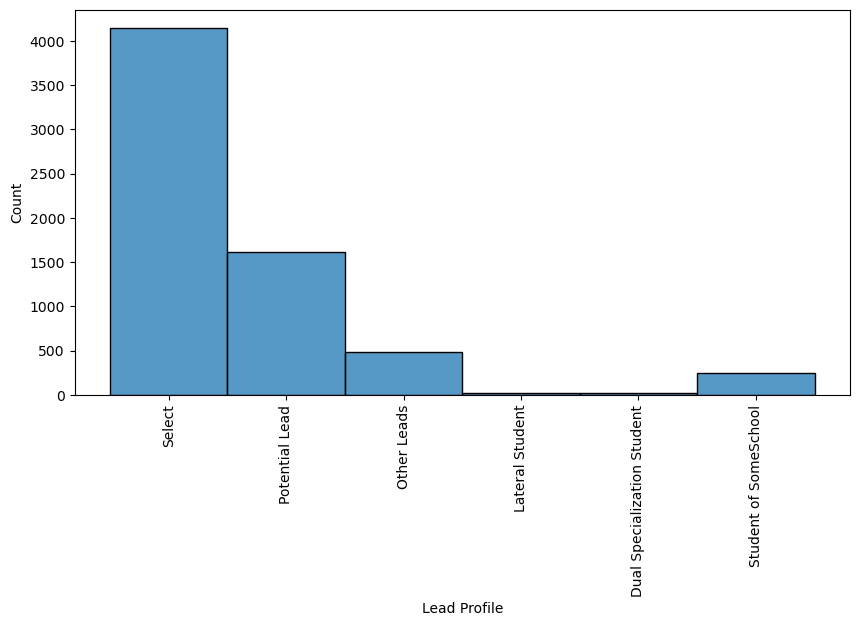

In [23]:
#analysing the column 'Lead Profile' which has 29% of missing values
#Visualizing the 'Lead Profile' column
plt.figure(figsize=(10,5))
sns.histplot(lead_df['Lead Profile'])
plt.xticks(rotation=90)
plt.show()

From the above histogram we know that the count value of 'Select' is high. And moreover this option means that the candidate did not select any option and it refers to the missing/null values. So there are more missing values hence the column can be dropped.

In [24]:
#Dropping the column
lead_df = lead_df.drop('Lead Profile', axis=1)

In [25]:
#Checking the missing values after dropping column
round(lead_df.isnull().sum()/len(lead_df),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                              16.0
How did you hear about X Education          24.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisemen

#### 5.Column: 'Specialization' with 16% missing values

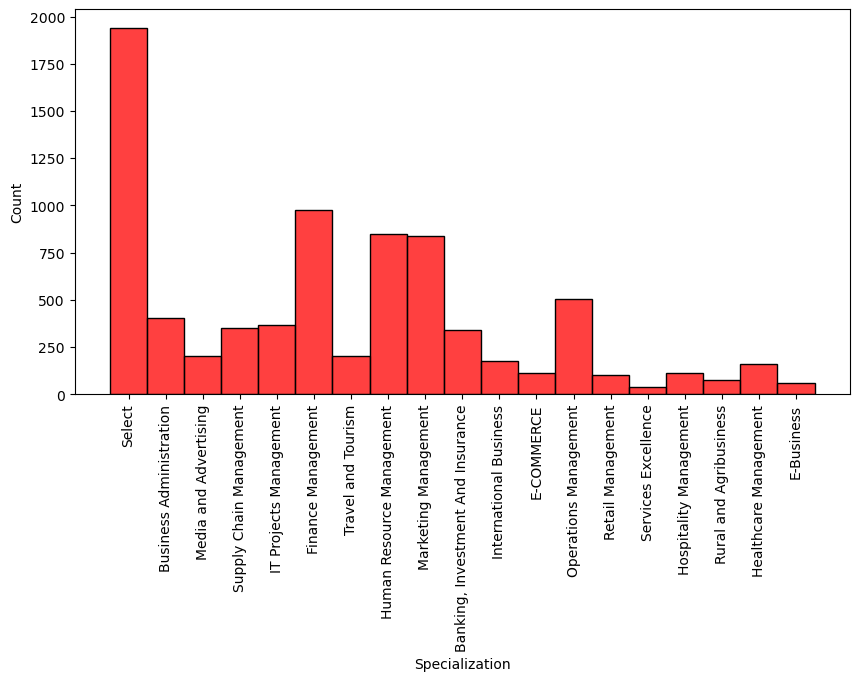

In [26]:
#analysing the column 'Specialization' which has 16% of missing values
#Visualizing the 'Specialization' column
plt.figure(figsize=(10,5))
sns.histplot(lead_df['Specialization'],color='Red')
plt.xticks(rotation=90)
plt.show()

Since the most of the values of the column are 'Select'.we can replace the missing values with 'Others' value. As 'Select' values are also missing values they also need to be repalced with 'Others' value.

In [27]:
#Imputing the missing values with 'others' in 'Specialization' column
lead_df['Specialization'] = lead_df['Specialization'].replace('Select','Others')
#Replacing the 'Select' values with 'Others' in 'Specialization' column
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan,'Others')

In [28]:
#Checking the null values of specialization column
lead_df['Specialization'].isnull().sum()

0

In [29]:
#Checking the value counts of Specialization
lead_df['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### 6.Column: 'Country' with 27% missing values

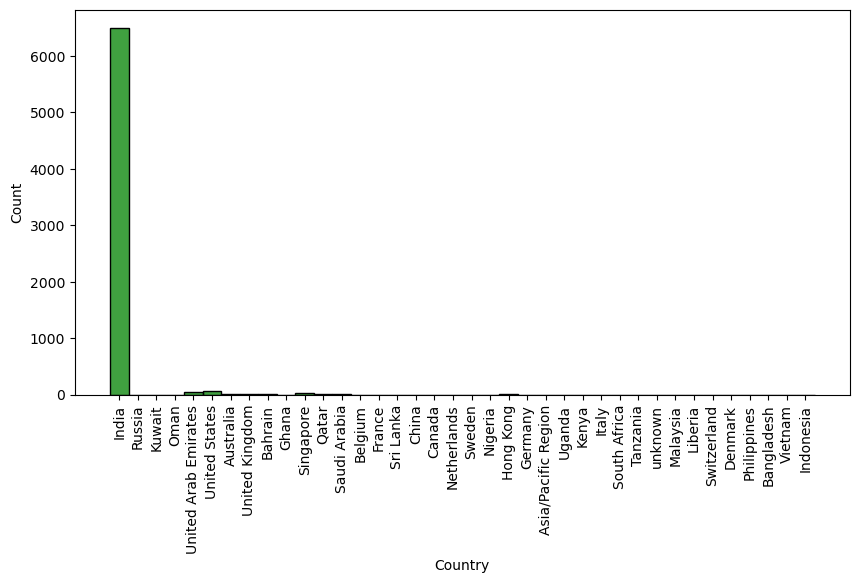

In [30]:
#analysing the column 'Country' which has 27% of missing values
#Visualizing the 'Country' column
plt.figure(figsize=(10,5))
sns.histplot(lead_df['Country'],color='Green')
plt.xticks(rotation=90)
plt.show()

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [31]:
# Imputing the missing data in the 'Country' column with 'India'
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

#### 7.Column: 'How did you hear about X Education' with 24% missing values

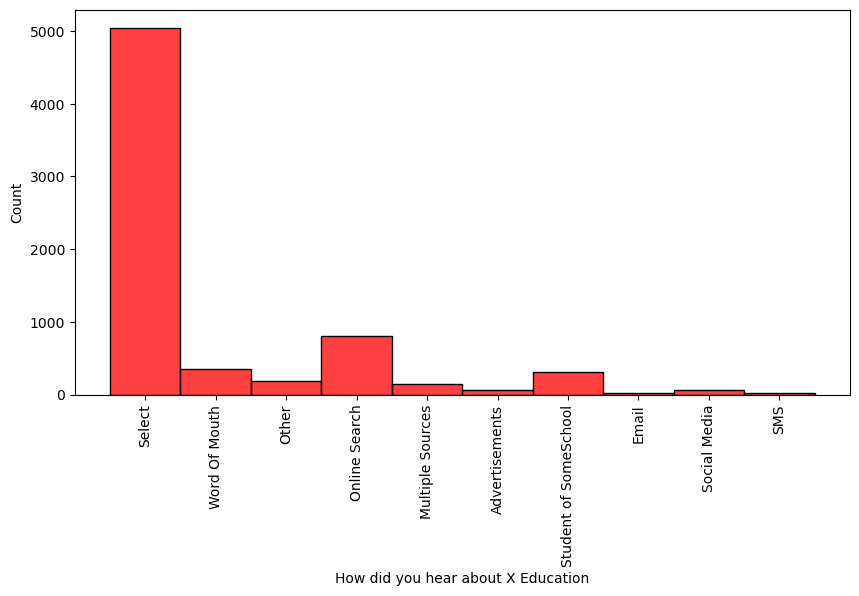

In [32]:
#analysing the column 'How did you hear about X Education' which has 24% of missing values
#Visualizing the 'How did you hear about X Education' column
plt.figure(figsize=(10,5))
sns.histplot(lead_df['How did you hear about X Education'],color='Red')
plt.xticks(rotation=90)
plt.show()

From the above histogram we know that the count value of 'Select' is high. And moreover this option means that the candidate did not select any option and it refers to the missing/null values. So there are more missing values hence the column can be dropped.

In [33]:
#Dropping the column
lead_df = lead_df.drop('How did you hear about X Education', axis=1)

#### 8.Column: 'City' with 15% missing values

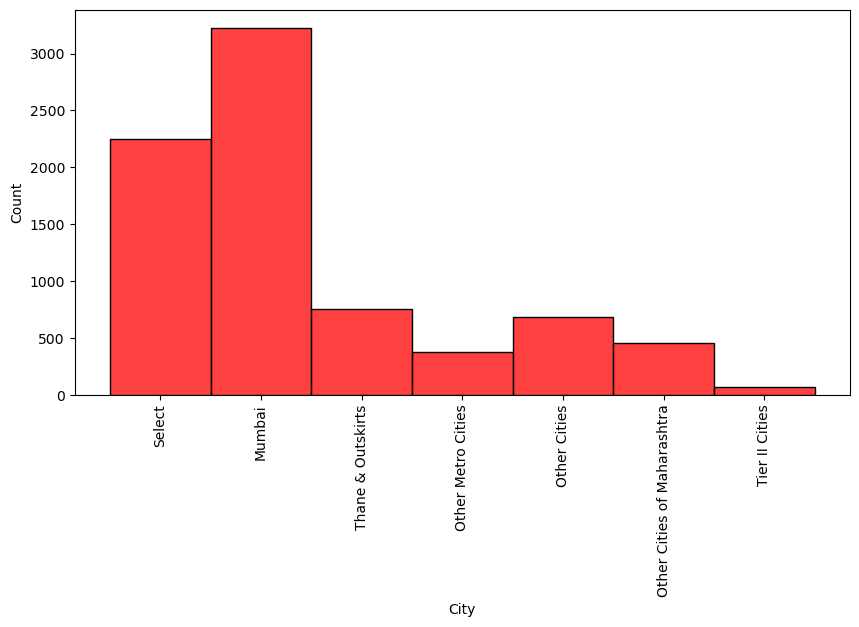

In [34]:
#analysing the column 'City' which has 15% of missing values
#Visualizing the 'City' column
plt.figure(figsize=(10,5))
sns.histplot(lead_df['City'],color='Red')
plt.xticks(rotation=90)
plt.show()

Since the most of the values of the column are 'Select'.we can replace the missing values with 'Mumbai' value. As 'Select' values are also missing values they also need to be repalced with 'Mumbai' value.

In [35]:
#Imputing the missing values with 'Mumbai' in 'City' column
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')
#Replacing the 'Select' values with 'Mumbai' in 'City' column
lead_df['City'] = lead_df['City'].replace('Select','Mumbai')

In [36]:
#Checking the null values in dataset
round(lead_df.isnull().sum()/len(lead_df),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Here the missing values count  is very low. we can just remove rows that are having null or missing values.

In [37]:
#Dropping the rows with null values.
lead_df.dropna(inplace=True)

In [38]:
#Checking the null values after dropping the rows and replacing the null values
round(lead_df.isnull().sum()/len(lead_df),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [39]:
#Checking the shape of dataset after cleaning the data
lead_df.shape

(9074, 29)

## Step-2 :Exploratory Data Analysis

### Univariate and Bivariate Analysis for each column

#### 1)Lead Origin


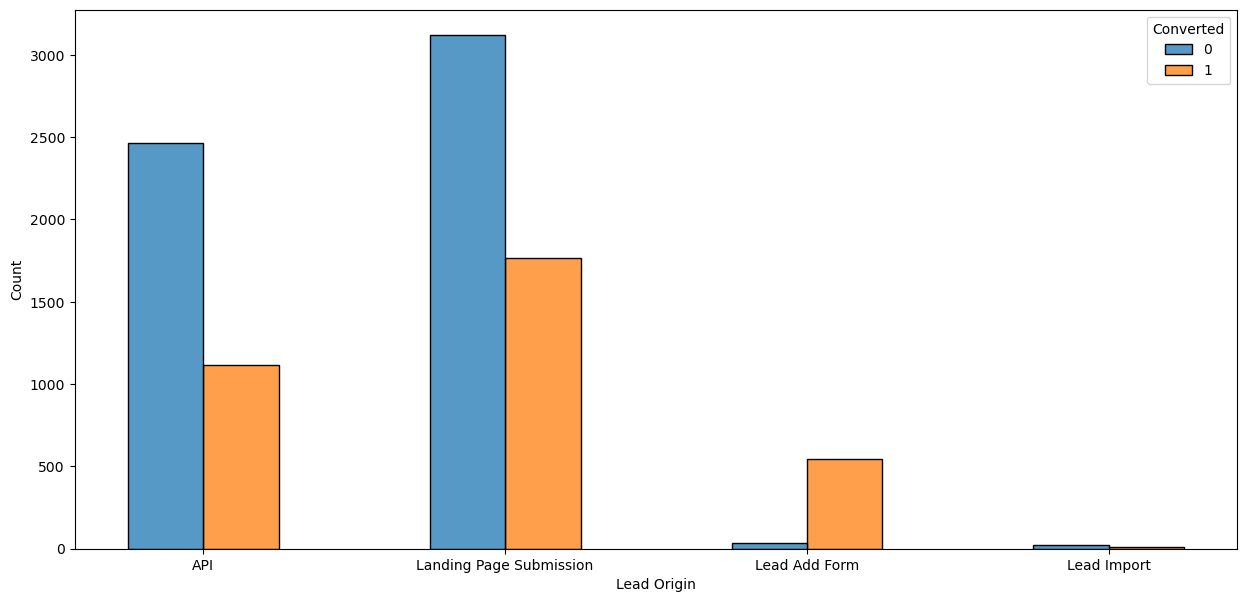

In [40]:
#Visualizing the column 'Lead Origin'
plt.figure(figsize=(15,7))
sns.histplot(x='Lead Origin', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.show()

#### 2)Lead Source

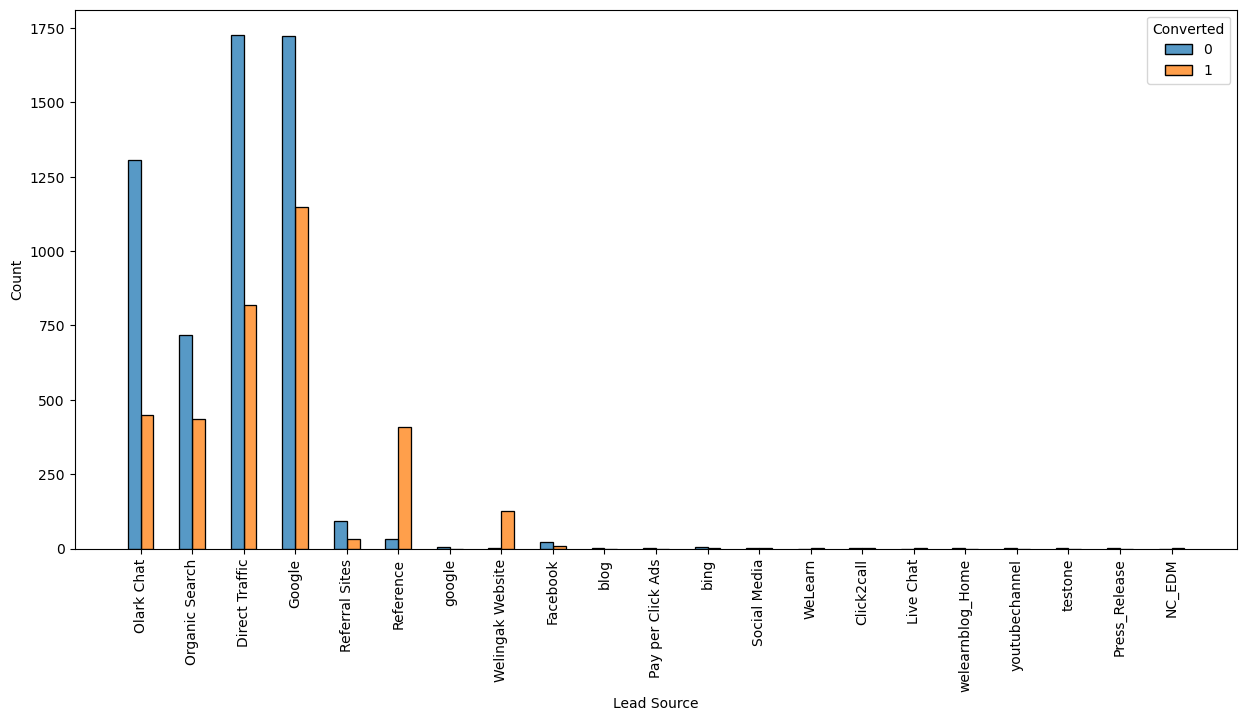

In [41]:
#Visualizing the column 'Lead Source'
plt.figure(figsize=(15,7))
sns.histplot(x='Lead Source', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

As we can see that there are two bins named as 'google' and 'Google' which means the same and there are other socia media platforms which are of small counts and they can merged as single name as 'Others'.And then visualize the column again.


In [42]:
#Replacing 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')

In [43]:
#Creating the new category 'Others' for other lead sources which do not have much values
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['blog','Pay per Click Ads','bing',
                                                         'Social Media','WeLearn','Click2call','Live Chat',
                                                         'welearnblog_Home','youtubechannel','testone','Press_Release'
                                                        ,'NC_EDM'],'Others')

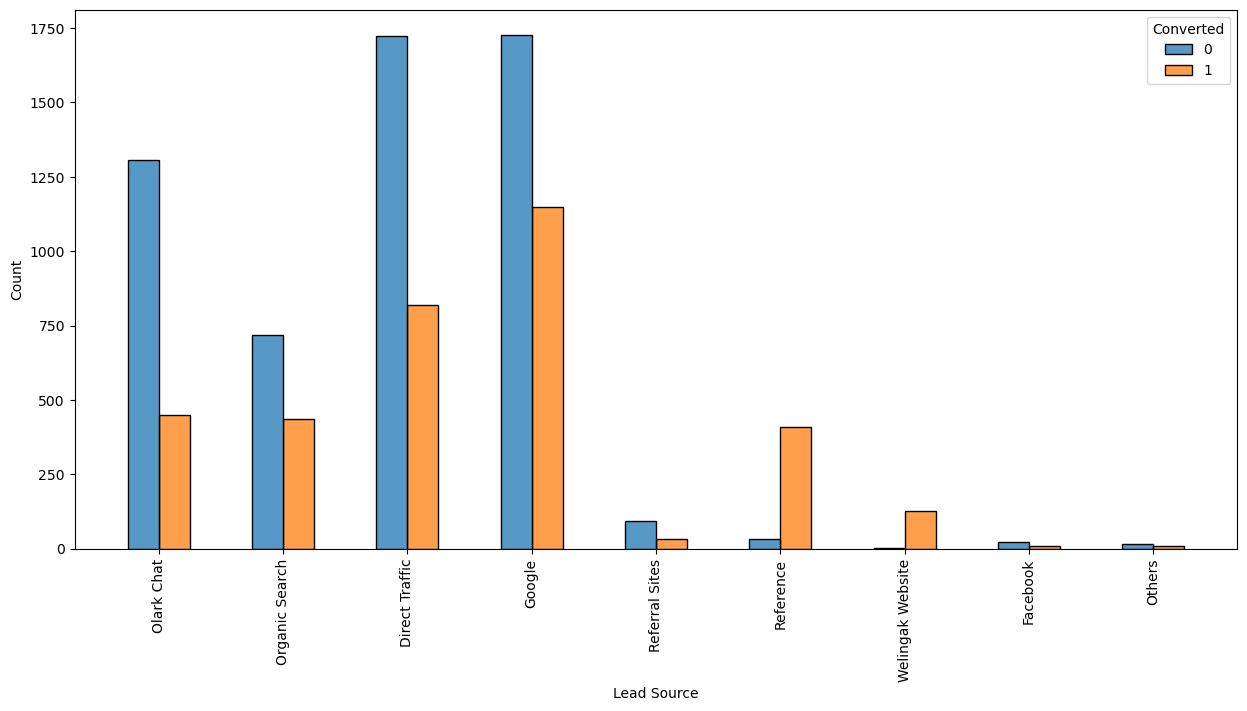

In [44]:
#Visualizing the column 'Lead Source' again
plt.figure(figsize=(15,7))
sns.histplot(x='Lead Source', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 3)Do Not Email

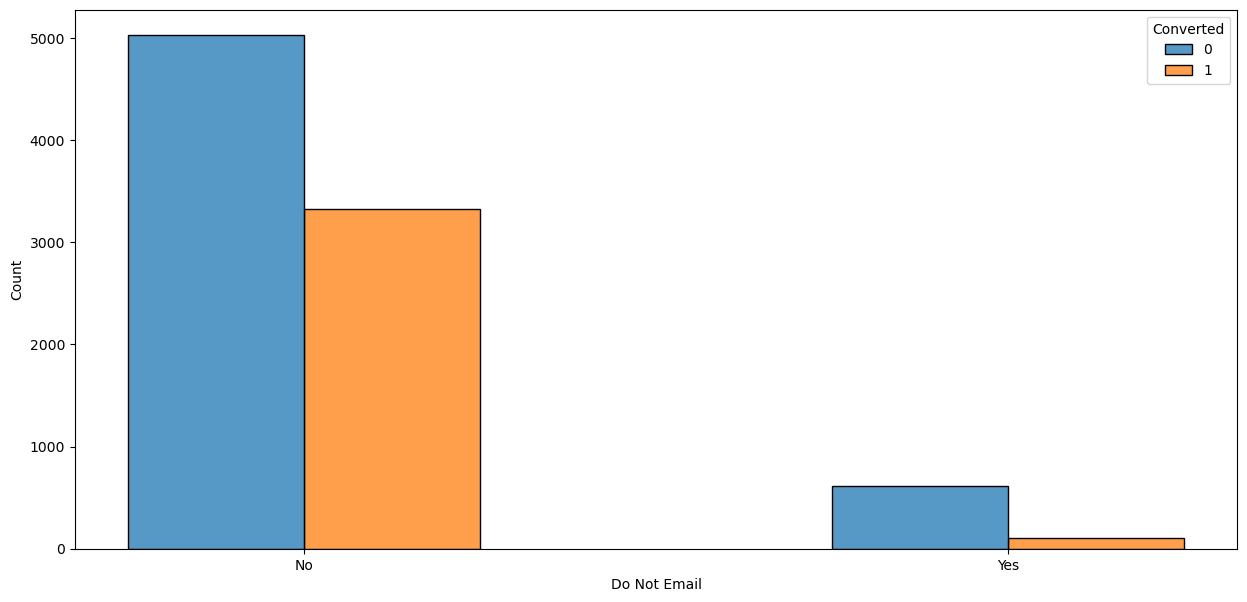

In [45]:
#Visualizing the column 'Do Not Email' 
plt.figure(figsize=(15,7))
sns.histplot(x='Do Not Email', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.show()

#### 4)Do Not Call

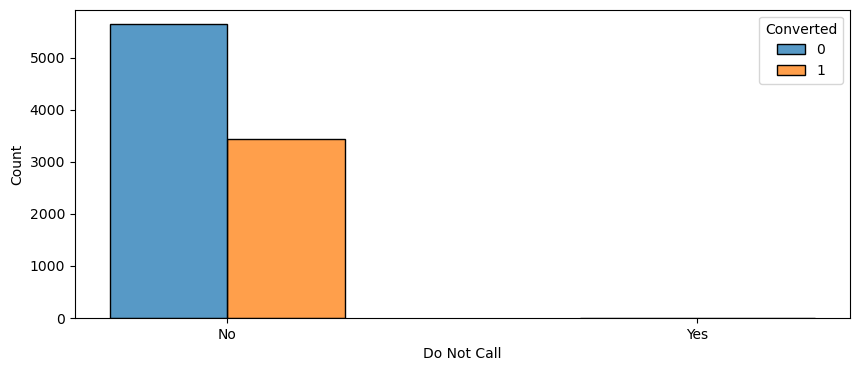

In [46]:
#Visualizing the column 'Do Not Call' 
plt.figure(figsize=(10,4))
sns.histplot(x='Do Not Call', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.show()

#### 5)Converted

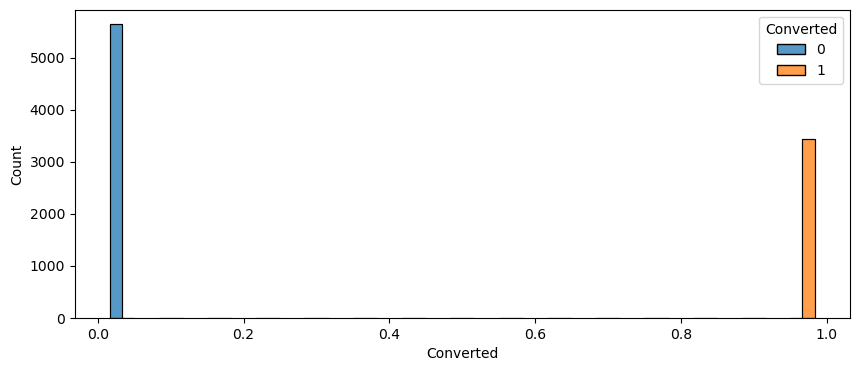

In [47]:
#Visualizing the column 'Converted' 
plt.figure(figsize=(10,4))
sns.histplot(x='Converted', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.show()

In [48]:
#Finding the percentage of lead conversion
round(sum(lead_df['Converted'])/len(lead_df['Converted']),2)*100

38.0

#### 6) TotalVisits

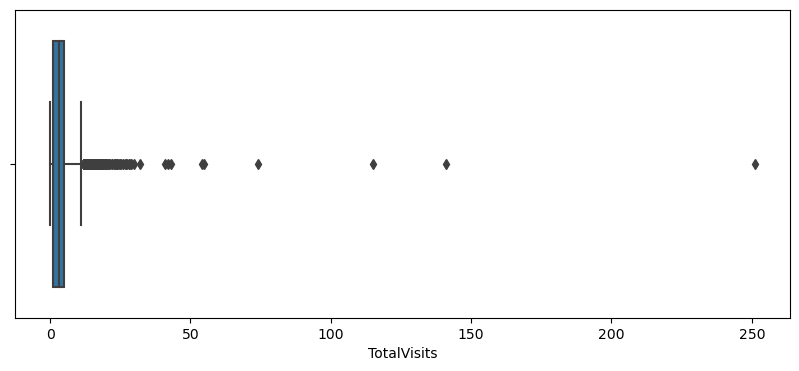

In [49]:
#Visualizing the column 'TotalVisits' 
plt.figure(figsize=(10,4))
sns.boxplot(x='TotalVisits', data=lead_df, hue='Converted')
plt.show()

As there are number of outliers in data. So we can cap upto 95% Value for analysis

In [50]:
#For capping the values
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

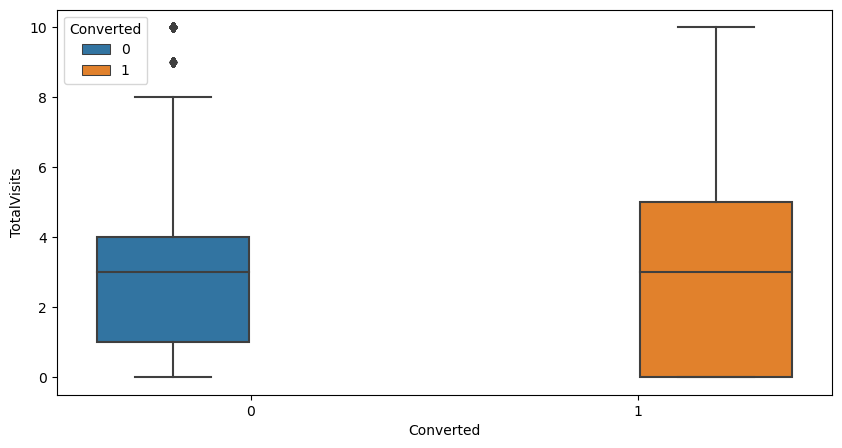

In [51]:
#Visualizing the column 'TotalVisits' again
plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='TotalVisits', data=lead_df, hue='Converted')
plt.show()

#### 7)Total Time Spent On Website

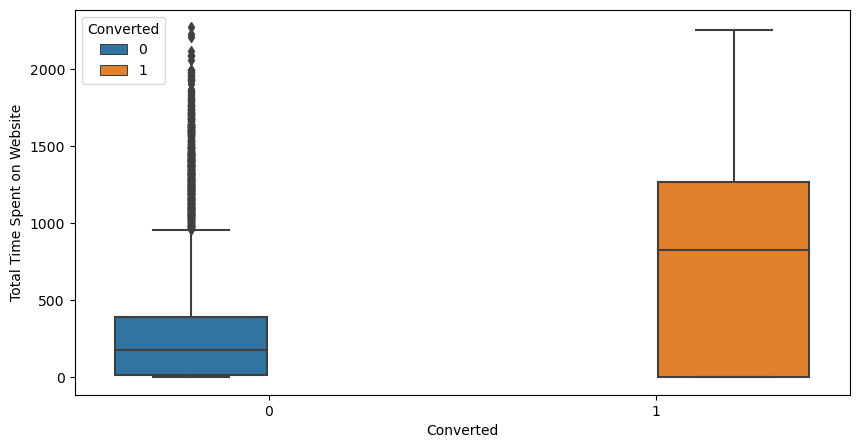

In [52]:
#Visualizing the column 'Total Time Spent On Website'
plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=lead_df, hue='Converted')
plt.show()

#### 8)Page Views Per Visit 

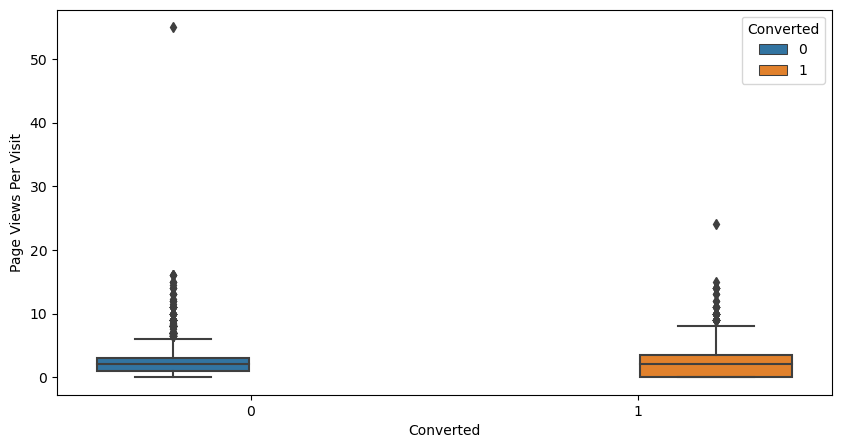

In [53]:
#Visualizing the column 'Page Views Per Visit '
plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Page Views Per Visit', data=lead_df, hue='Converted')
plt.show()

As there are number of outliers in data. So we can cap upto 95% Value for analysis

In [54]:
#For capping the values
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

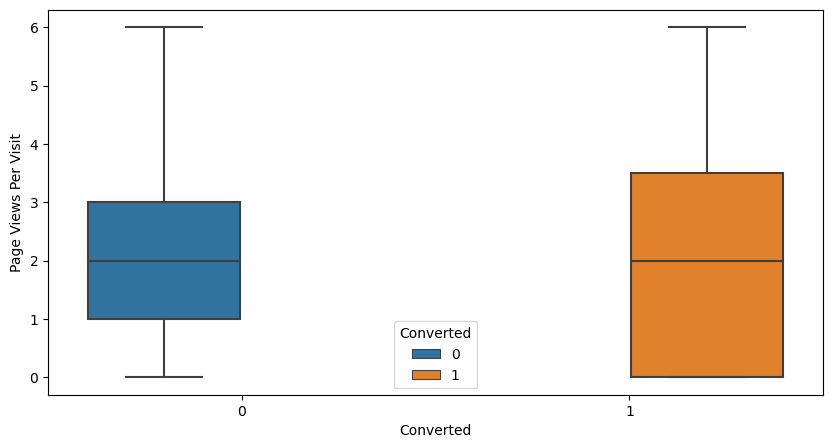

In [55]:
#Visualizing the column 'Page Views Per Visit' again
plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Page Views Per Visit', data=lead_df, hue='Converted')
plt.show()

#### 9)Last Activity

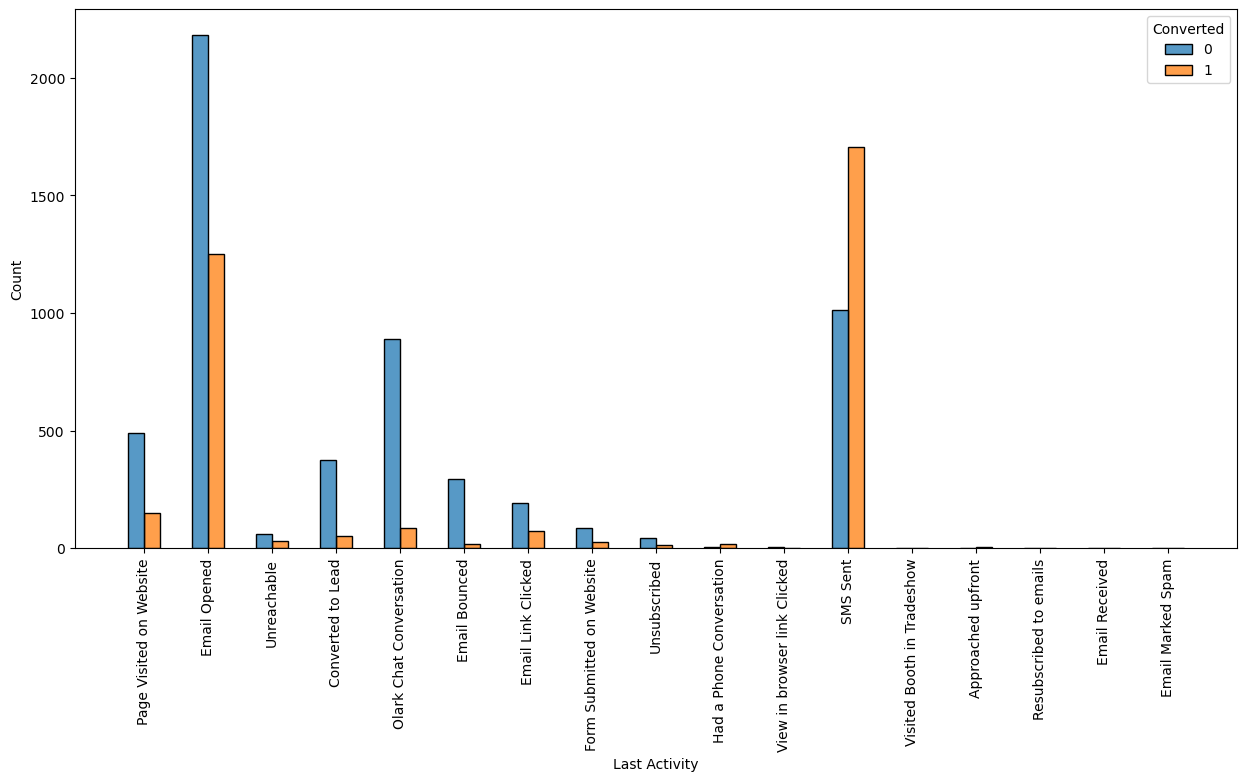

In [56]:
#Visualizing the column 'Last Activity'
plt.figure(figsize=(15,7))
sns.histplot(x='Last Activity', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

In [57]:
#We can club the last activities to 'Other Activity' which are having less data
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversion','View in browser link Clicked',
                                                             'Visited Booth in Tradeshow','Approached upfront',
                                                             'Resubscribed to emails','Email Received',
                                                             'Email Marked Spam'],'Other Activity')

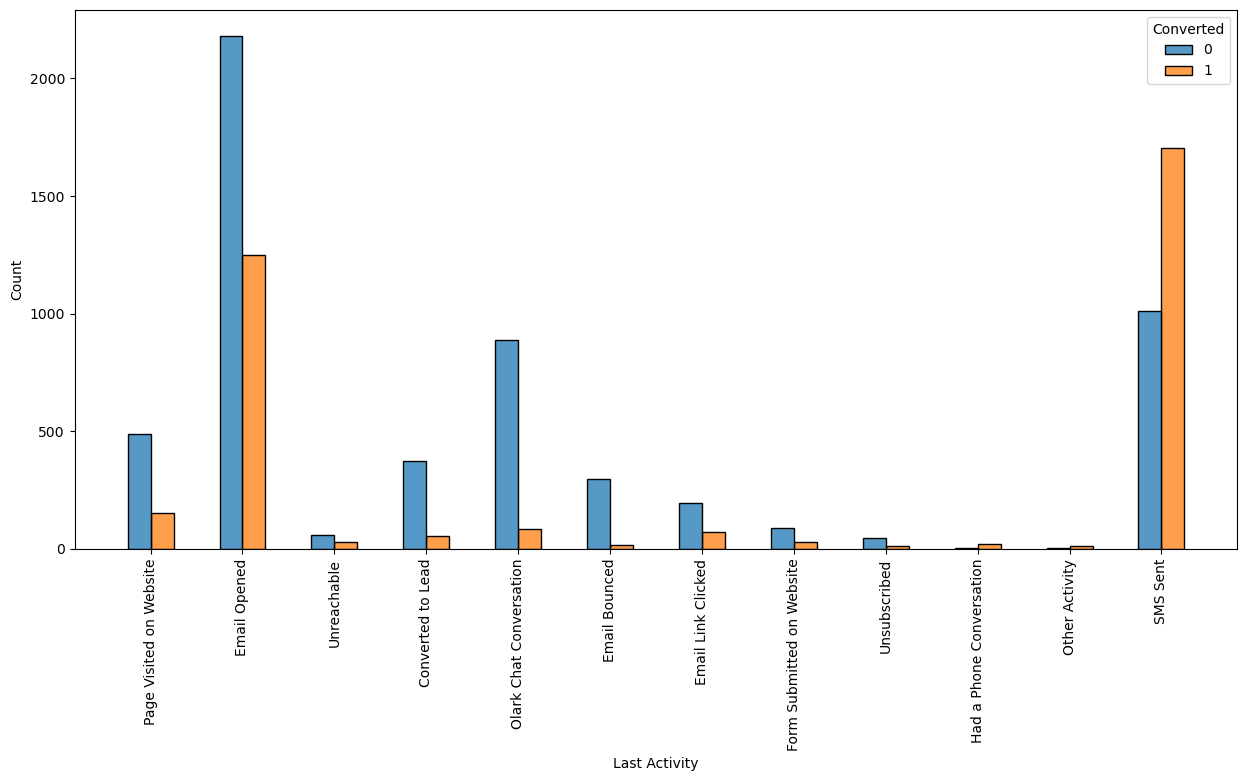

In [58]:
#Visualizing the column 'Last Activity' again
plt.figure(figsize=(15,7))
sns.histplot(x='Last Activity', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 10) Country

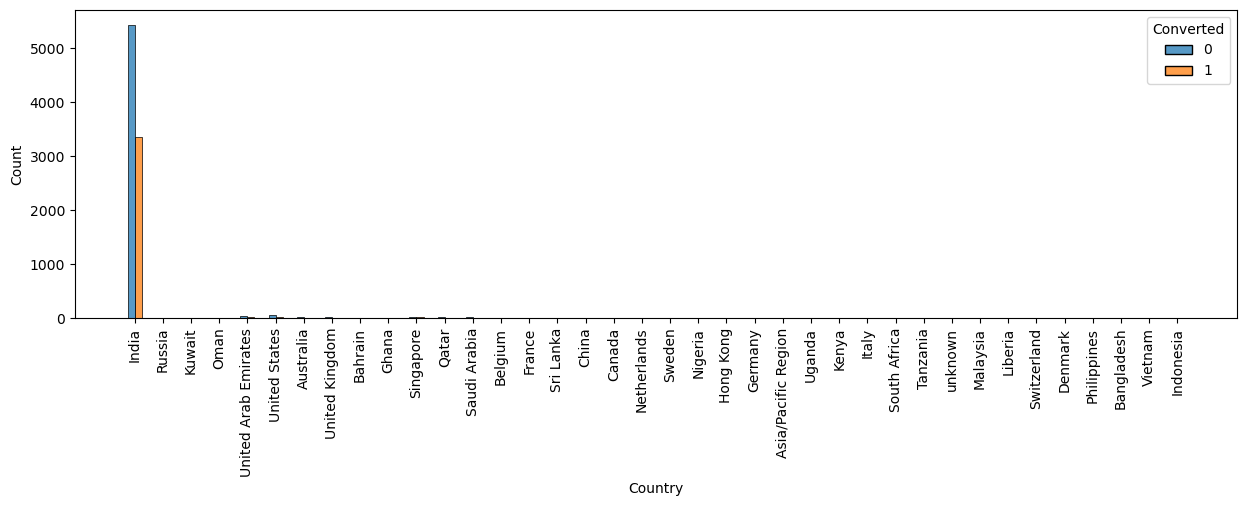

In [59]:
#Visualizing the column 'Country'
plt.figure(figsize=(15,4))
sns.histplot(x='Country', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 11) Specialization

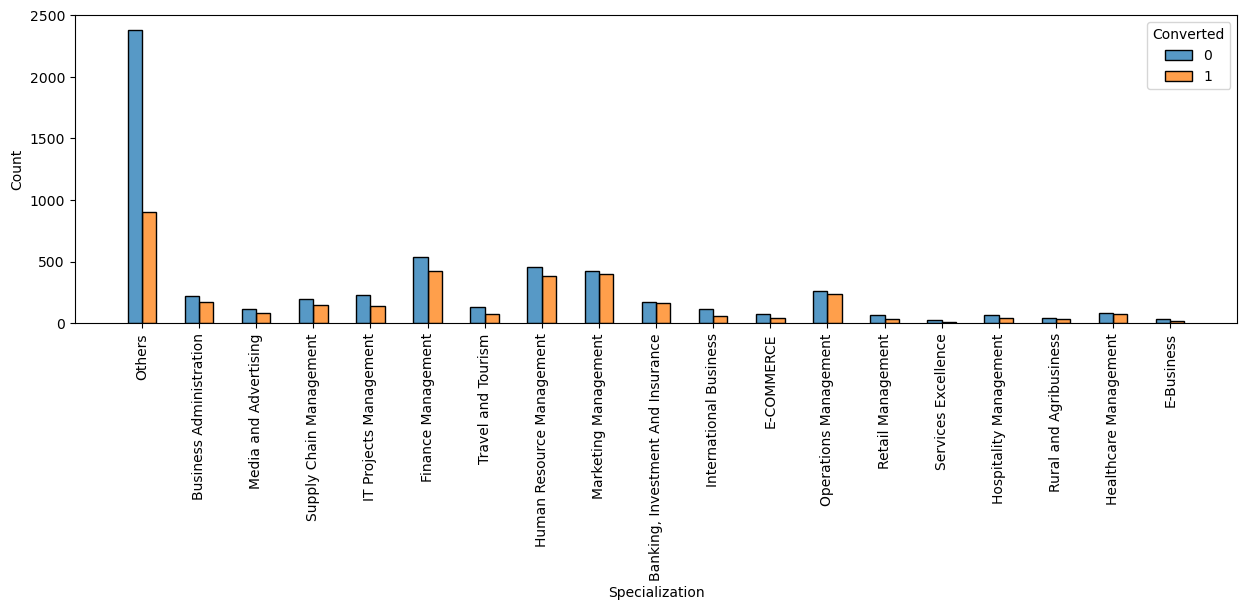

In [60]:
#Visualizing the column 'Specialization'
plt.figure(figsize=(15,4))
sns.histplot(x='Specialization', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 12) What is your current Occupation

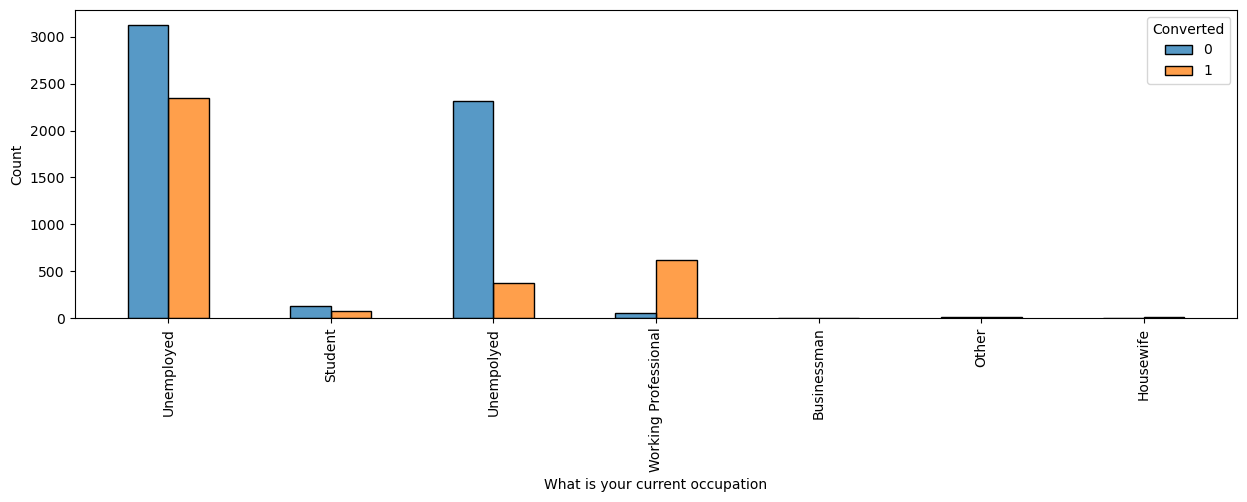

In [61]:
#Visualizing the column 'What is your current occupation '
plt.figure(figsize=(15,4))
sns.histplot(x='What is your current occupation', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

In [62]:
#Repalcing the 'Unemployed' with 'Unempolyed'
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace('Unempolyed','Unemployed')

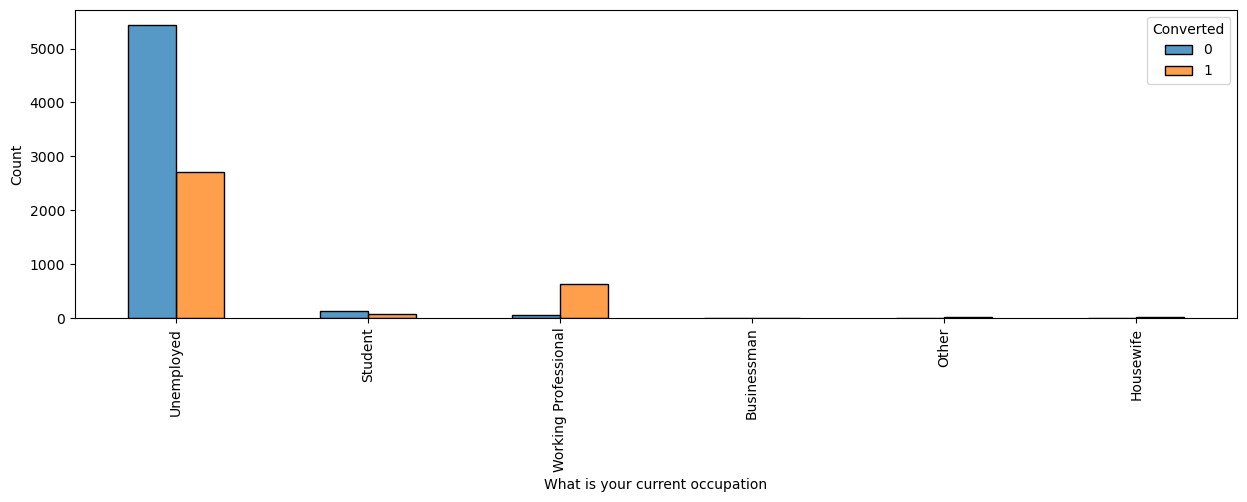

In [63]:
#Visualizing the column 'What is your current occupation ' again
plt.figure(figsize=(15,4))
sns.histplot(x='What is your current occupation', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 13) Search

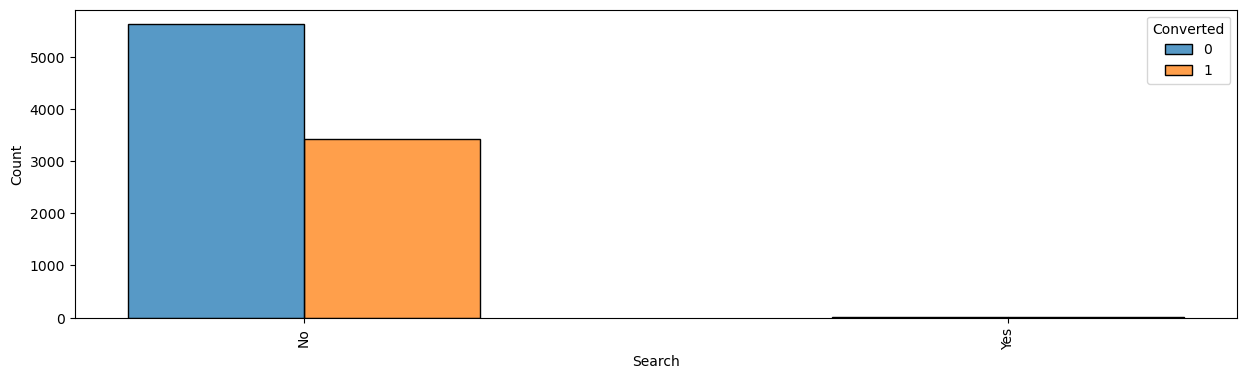

In [64]:
#Visualizing the column 'Search'
plt.figure(figsize=(15,4))
sns.histplot(x='Search', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 14) Magazine

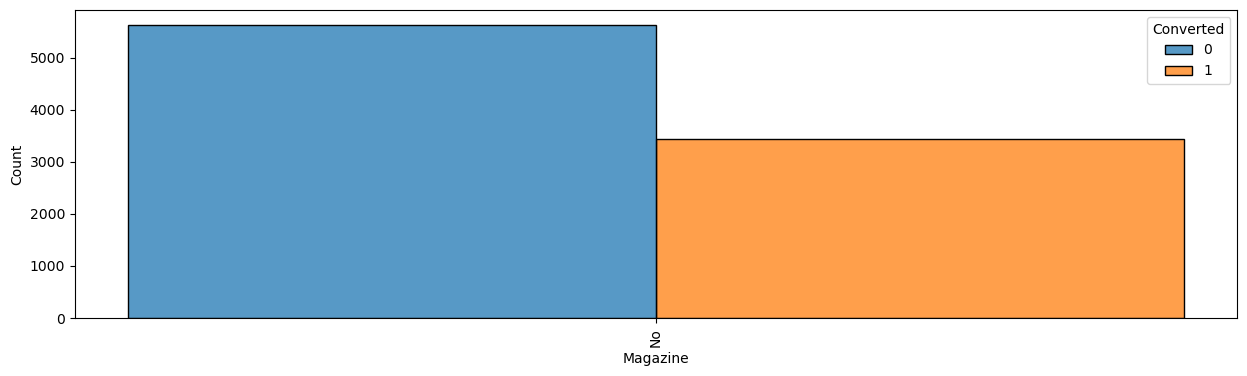

In [65]:
#Visualizing the column 'Magazine'
plt.figure(figsize=(15,4))
sns.histplot(x='Magazine', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 15) Newspaper Article

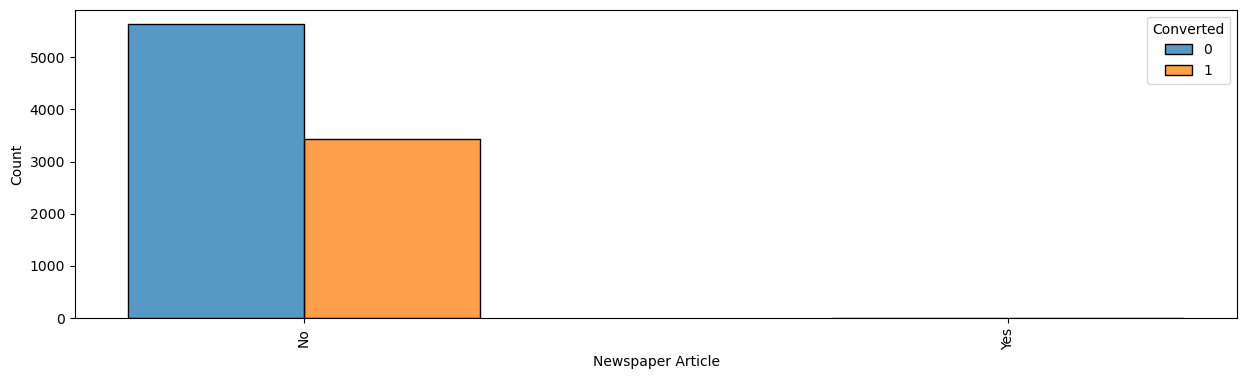

In [66]:
#Visualizing the column 'Newspaper Article'
plt.figure(figsize=(15,4))
sns.histplot(x='Newspaper Article', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 16) X Education Forums

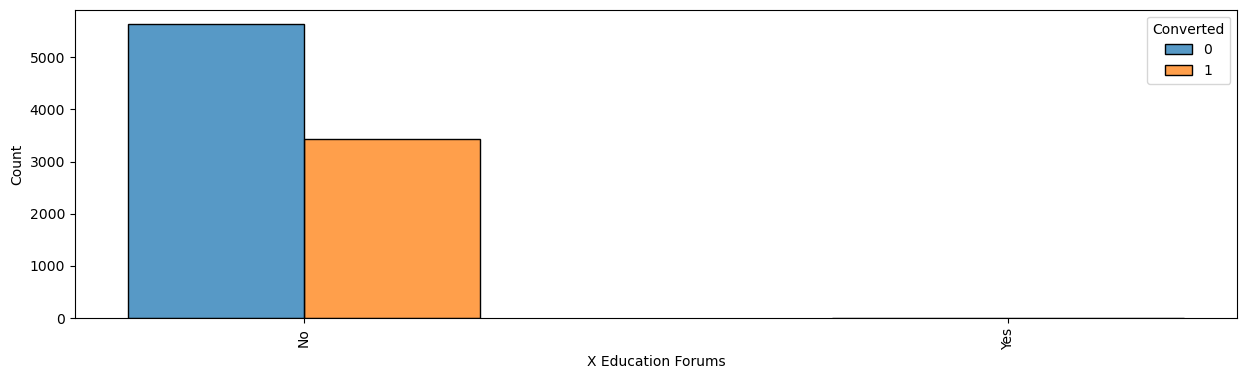

In [67]:
#Visualizing the column 'X Education Forums'
plt.figure(figsize=(15,4))
sns.histplot(x='X Education Forums', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 17) Newspaper

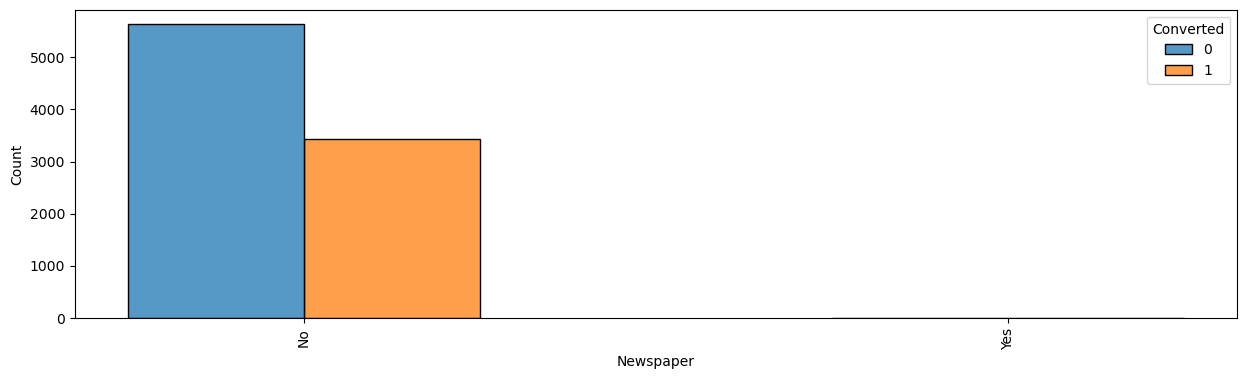

In [68]:
#Visualizing the column 'Newspaper'
plt.figure(figsize=(15,4))
sns.histplot(x='Newspaper', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 18) Digital Advertisement

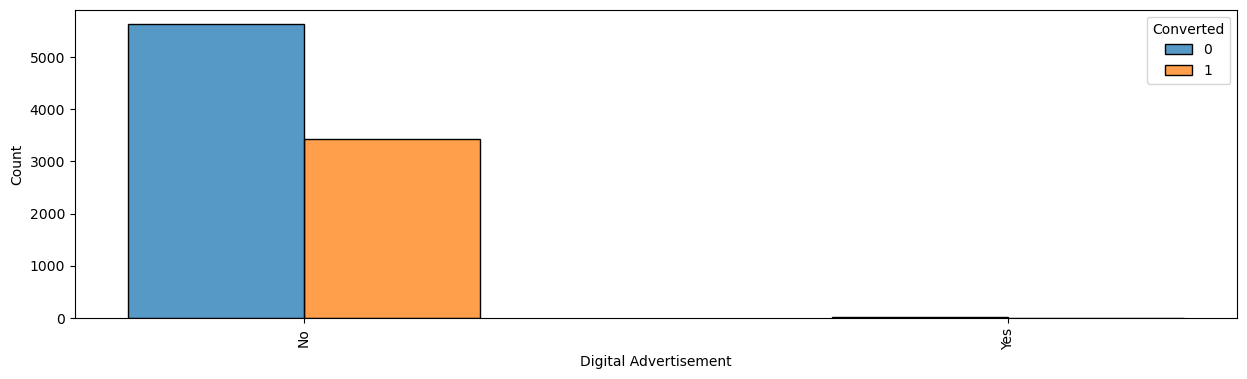

In [69]:
#Visualizing the column 'Digital Advertisement'
plt.figure(figsize=(15,4))
sns.histplot(x='Digital Advertisement', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 19) Through Recommendations

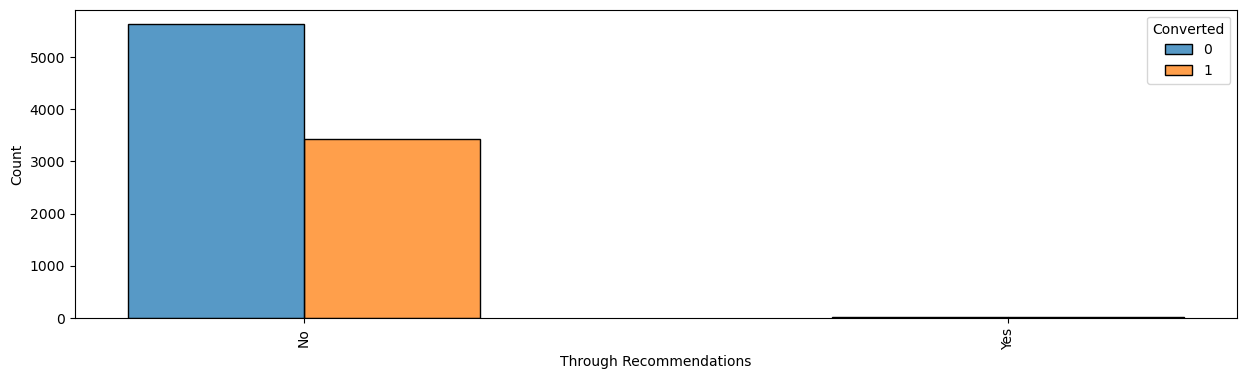

In [70]:
#Visualizing the column 'Through Recommendations'
plt.figure(figsize=(15,4))
sns.histplot(x='Through Recommendations', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 20) Receive More Updates About Our Courses

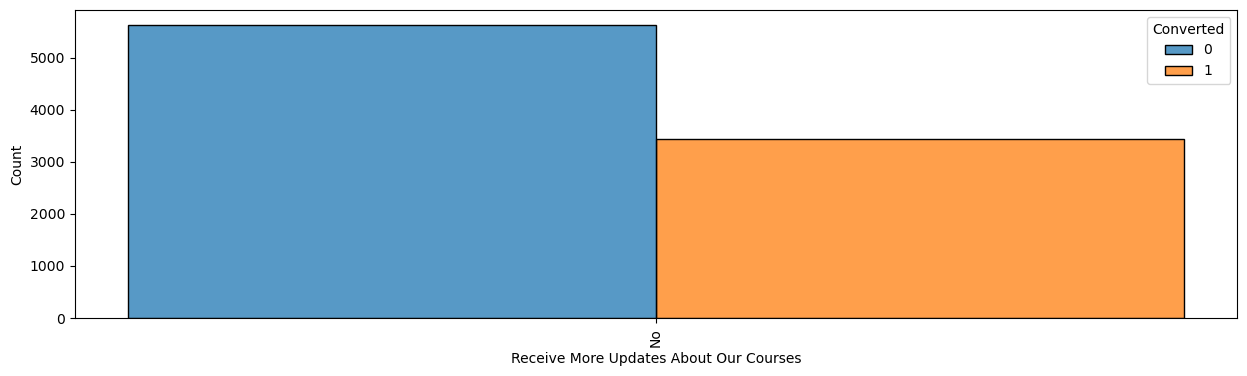

In [71]:
#Visualizing the column 'Receive More Updates About Our Courses'
plt.figure(figsize=(15,4))
sns.histplot(x='Receive More Updates About Our Courses', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 21) Tags

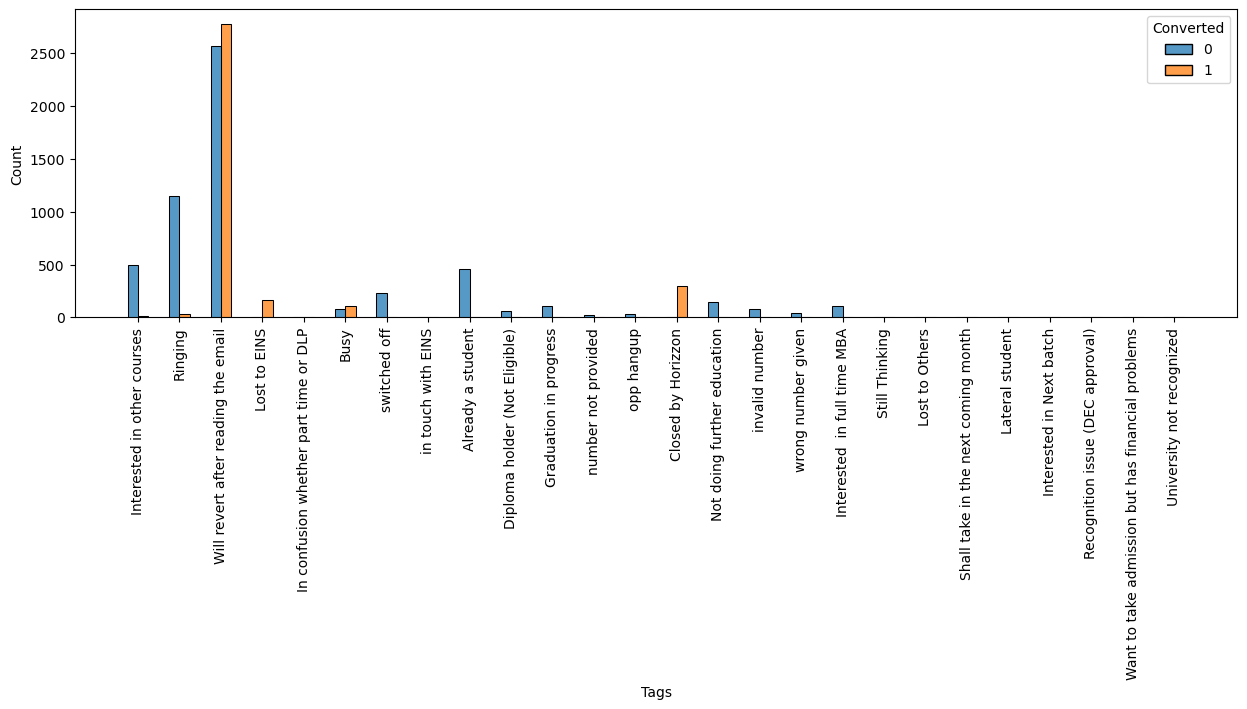

In [72]:
#Visualizing the column 'Tags'
plt.figure(figsize=(15,4))
sns.histplot(x='Tags', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 22) Update me on Supply Chain Content

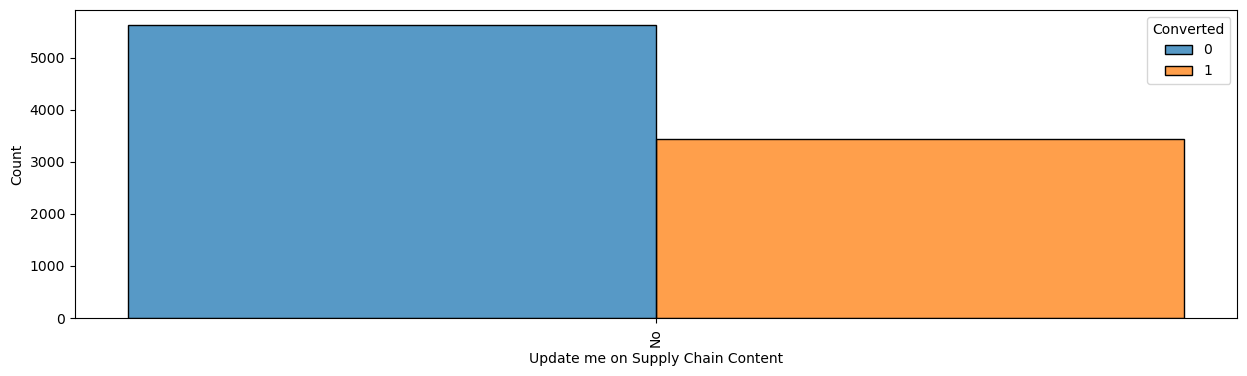

In [73]:
#Visualizing the column 'Update me on Supply Chain Content'
plt.figure(figsize=(15,4))
sns.histplot(x='Update me on Supply Chain Content', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 23) Get updates on DM Content

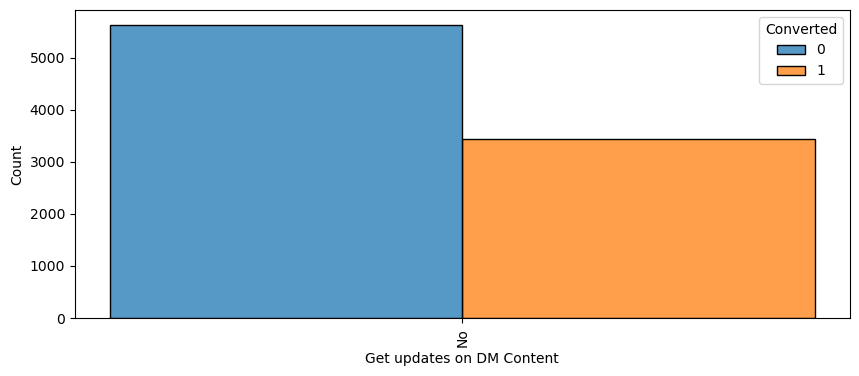

In [74]:
#Visualizing the column 'Get updates on DM Content'
plt.figure(figsize=(10,4))
sns.histplot(x='Get updates on DM Content', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 24) City

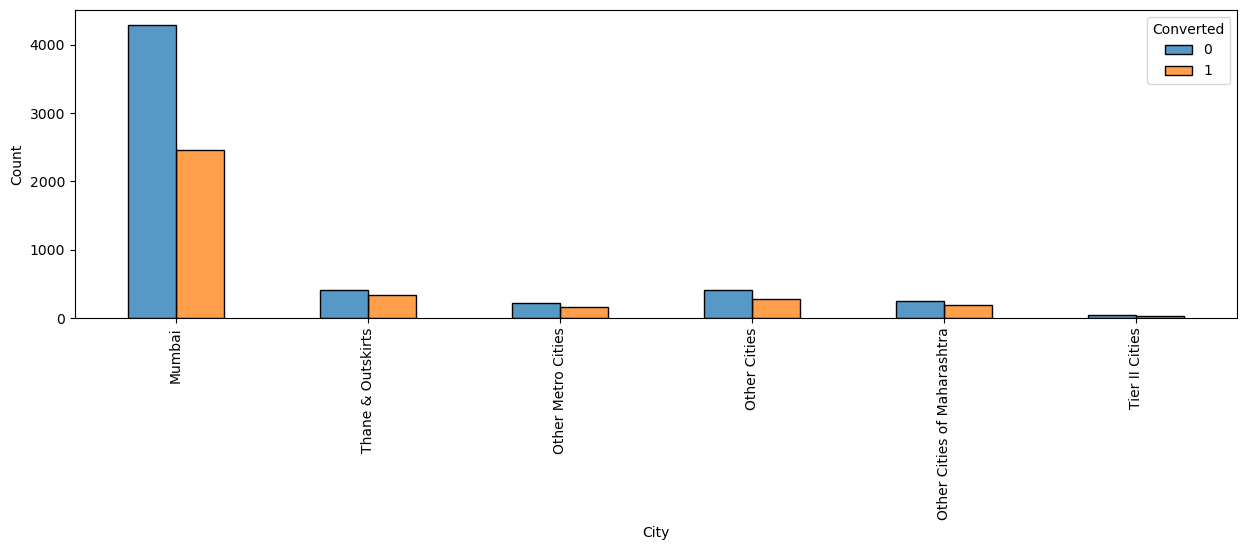

In [75]:
#Visualizing the column 'City'
plt.figure(figsize=(15,4))
sns.histplot(x='City', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 25) I agree to pay the amount through cheque

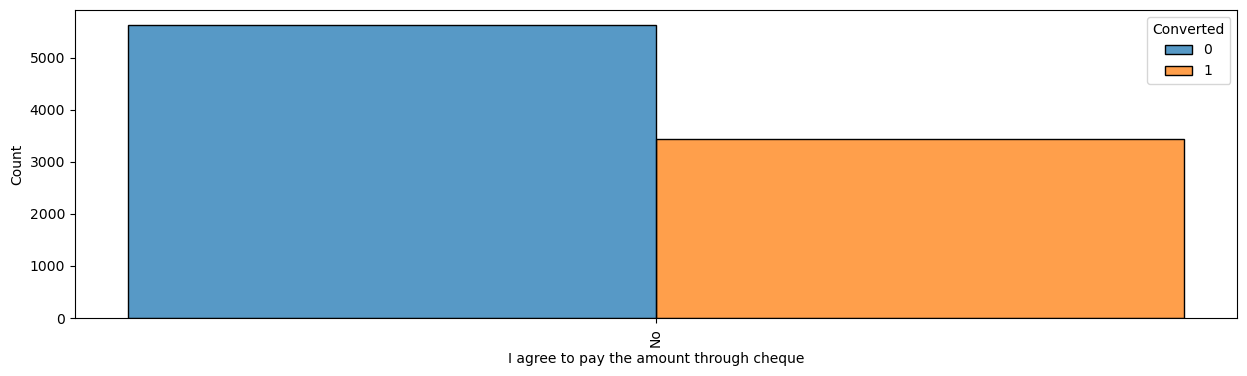

In [76]:
#Visualizing the column 'I agree to pay the amount through cheque'
plt.figure(figsize=(15,4))
sns.histplot(x='I agree to pay the amount through cheque', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 26) A free copy of Mastering The Interview

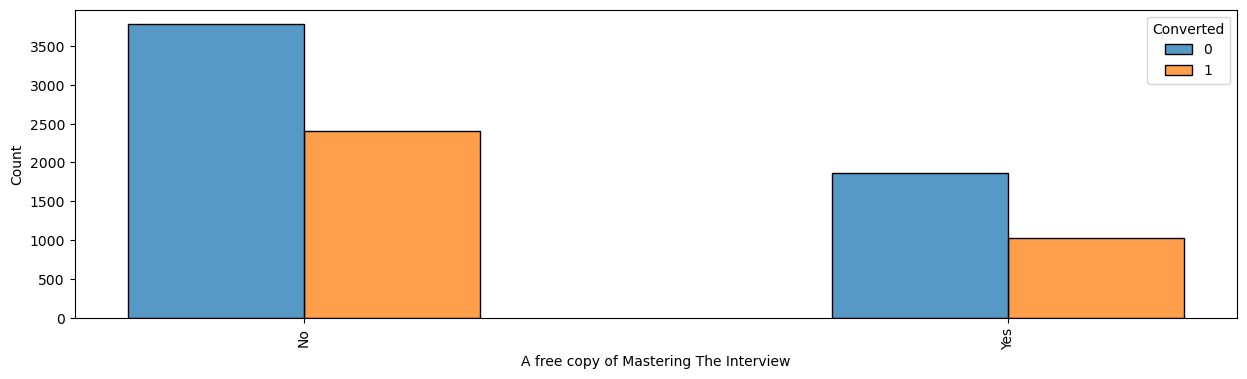

In [77]:
#Visualizing the column 'A free copy of Mastering The Interview'
plt.figure(figsize=(15,4))
sns.histplot(x='A free copy of Mastering The Interview', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

#### 27) Last Notable Activity

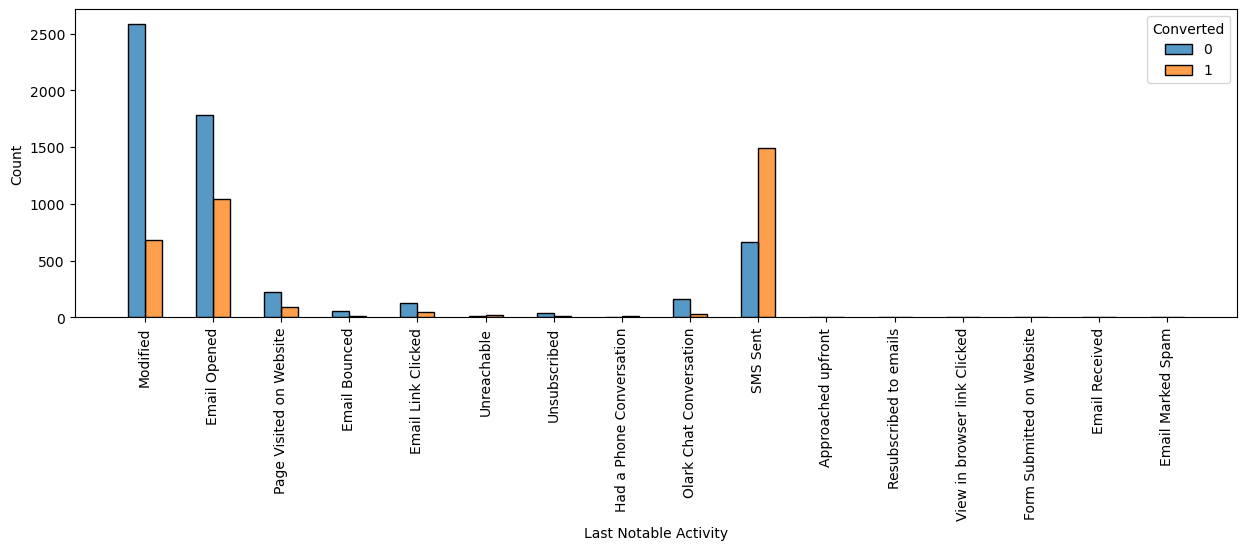

In [78]:
#Visualizing the column 'Last Notable Activity'
plt.figure(figsize=(15,4))
sns.histplot(x='Last Notable Activity', data=lead_df, hue='Converted', multiple ='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

## Step-3 : Data Preparation For Model Building

In [79]:
#Dropping the columns that are not adding any information to model 
lead_df = lead_df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

In [80]:
#Checking the shape of dataset
lead_df.shape

(9074, 14)

In [81]:
#Checking the dataset
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [82]:
#Creating binary variables for 'Do Not Email' and 'Do Not Call'
lead_df['Do Not Email'] = lead_df['Do Not Email'].apply(lambda x : 1 if x=='Yes' else 0)
lead_df['Do Not Call'] = lead_df['Do Not Call'].apply(lambda x : 1 if x=='yes' else 0)

In [83]:
#Creating dummy variables for categorical variables
dummy_df = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']],drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
#Dropping the columns for which dummies are created.
lead_df = lead_df.drop(['Lead Origin','Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [85]:
#Merging the dummy dataset into lead dataset
lead_df = pd.concat([lead_df,dummy_df],axis=1)

In [86]:
#Checking the dataset
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Splitting the data into test and train set

In [87]:
#importing the necessary libraries
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [88]:
#creating y-variable  and reading the target variable to it .
y = lead_df['Converted']

In [89]:
#Checking the y-variable
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [90]:
#Creating the X-variable and reading the feature variable to it.
X = lead_df.drop(['Prospect ID','Converted'],axis=1)

In [91]:
#Checking the X-variable
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [92]:
#Splitting the data into train and test data.
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [93]:
#Checking the train dataset
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,2.0,397,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,2.0,190,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,2.0,1380,2.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,5.0,1584,2.5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Scaling the Feature and feature selection 

In [94]:
#Scaling the numerical values
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                      'Total Time Spent on Website','Page Views Per Visit']])


In [95]:
#Checking the scaled dataset
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [97]:
#RFE feature selection 
rfe = RFE(logreg,)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression())

In [98]:
#Checking the rfe variables
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [99]:
#names of rfe variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 36),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 9),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 22),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', Fal

In [100]:
#reading all the names of column into variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
  

## Step 4: Model Building

In [101]:
#Function for logistic regression model
def logistic_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    result = logm1.fit()
    print(result.summary())
    return result

### Model 1:

In [102]:
#building the first model
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.2
Date:                Mon, 19 Feb 2024   Deviance:                       5136.3
Time:                        15:52:38   Pearson chi2:                 6.41e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [103]:
#importing the VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
#defining function for VIF
def log_vif(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [105]:
#VIF for first model 
log_vif(col)

,Features,VIF
20,What is your current occupation_Unemployed,290.98
27,Last Notable Activity_Modified,117.75
25,Last Notable Activity_Email Opened,105.85
31,Last Notable Activity_SMS Sent,85.35
3,Lead Origin_Lead Add Form,62.69
6,Lead Source_Reference,48.13
21,What is your current occupation_Working Profes...,25.50
7,Lead Source_Welingak Website,15.52
29,Last Notable Activity_Page Visited on Website,12.10
9,Last Activity_Email Opened,9.29


In [106]:
# Dropping the column 'Last Notable Activity_View in browser link Clicked'
col = col.drop('Last Notable Activity_View in browser link Clicked')

### Model 2:

In [107]:
#Building the model after dropping  the 'Last Notable Activity_View in browser link Clicked' column
logistic_model(col)
log_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.2
Date:                Mon, 19 Feb 2024   Deviance:                       5138.4
Time:                        15:52:40   Pearson chi2:                 6.41e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
20,What is your current occupation_Unemployed,283.74
27,Last Notable Activity_Modified,114.95
25,Last Notable Activity_Email Opened,103.46
31,Last Notable Activity_SMS Sent,83.45
3,Lead Origin_Lead Add Form,62.69
6,Lead Source_Reference,48.13
21,What is your current occupation_Working Profes...,24.91
7,Lead Source_Welingak Website,15.52
29,Last Notable Activity_Page Visited on Website,11.85
9,Last Activity_Email Opened,9.29


In [108]:
# Dropping the column 'Last Notable Activity_View in browser link Clicked'
col = col.drop('Last Notable Activity_Olark Chat Conversation')
col = col.drop('Last Notable Activity_Page Visited on Website')
col = col.drop('Last Notable Activity_Resubscribed to emails')

### Model 3:

In [109]:
#Building the model after removing the columns.
logistic_model(col)
log_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.3
Date:                Mon, 19 Feb 2024   Deviance:                       5140.6
Time:                        15:52:41   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Lead Origin_Lead Add Form,62.68
6,Lead Source_Reference,48.13
20,What is your current occupation_Unemployed,27.82
7,Lead Source_Welingak Website,15.52
25,Last Notable Activity_Email Opened,12.58
28,Last Notable Activity_SMS Sent,10.53
9,Last Activity_Email Opened,8.94
27,Last Notable Activity_Modified,8.31
13,Last Activity_SMS Sent,7.63
2,Lead Origin_Landing Page Submission,7.32


In [110]:
#Droppping the columns with high p value
col = col.drop('What is your current occupation_Housewife')
col = col.drop('Last Notable Activity_Email Link Clicked ')
col = col.drop('Last Activity_Unreachable')

KeyError: "['Last Notable Activity_Email Link Clicked '] not found in axis"

### Model 4 :

In [111]:
# Building the model after dropping the columns
logistic_model(col)
log_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.2
Date:                Mon, 19 Feb 2024   Deviance:                       5144.5
Time:                        16:08:44   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Lead Origin_Lead Add Form,62.67
6,Lead Source_Reference,48.12
19,What is your current occupation_Unemployed,27.03
7,Lead Source_Welingak Website,15.52
24,Last Notable Activity_Email Opened,12.48
27,Last Notable Activity_SMS Sent,10.45
9,Last Activity_Email Opened,8.93
26,Last Notable Activity_Modified,8.20
13,Last Activity_SMS Sent,7.63
2,Lead Origin_Landing Page Submission,7.27


In [112]:
#Dropping  the column with high vif value
col = col.drop('Lead Origin_Lead Add Form')

### Model 5 : 

In [113]:
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.8
Date:                Mon, 19 Feb 2024   Deviance:                       5147.7
Time:                        16:29:33   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4070
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [114]:
log_vif(col)

,Features,VIF
18,What is your current occupation_Unemployed,26.95
23,Last Notable Activity_Email Opened,12.48
26,Last Notable Activity_SMS Sent,10.45
8,Last Activity_Email Opened,8.93
25,Last Notable Activity_Modified,8.20
12,Last Activity_SMS Sent,7.63
2,Lead Origin_Landing Page Submission,7.24
16,Specialization_Others,4.65
14,Last Activity_Unsubscribed,3.67
28,Last Notable Activity_Unsubscribed,3.66


In [115]:
#Dropping columns with high p value
col = col.drop('Last Notable Activity_Email Link Clicked')

### Model 6:

In [116]:
#Building the model again
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.9
Date:                Mon, 19 Feb 2024   Deviance:                       5147.8
Time:                        16:34:44   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4070
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [117]:
#Dropping column 'Last Notable Activity_Unsubscribed'
col = col.drop('Last Notable Activity_Unsubscribed')

### Model 7:

In [118]:
#Building the model again
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.0
Date:                Mon, 19 Feb 2024   Deviance:                       5147.9
Time:                        16:36:41   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [119]:
#Checking vif values
log_vif(col)

,Features,VIF
18,What is your current occupation_Unemployed,22.55
22,Last Notable Activity_Email Opened,11.22
25,Last Notable Activity_SMS Sent,9.42
8,Last Activity_Email Opened,8.86
12,Last Activity_SMS Sent,7.58
2,Lead Origin_Landing Page Submission,7.24
24,Last Notable Activity_Modified,6.72
16,Specialization_Others,4.64
23,Last Notable Activity_Had a Phone Conversation,3.44
9,Last Activity_Had a Phone Conversation,3.43


In [120]:
#Dropping the columns with high vif value
col = col.drop('What is your current occupation_Unemployed')

In [121]:
#Checking the model
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.5
Date:                Mon, 19 Feb 2024   Deviance:                       5155.0
Time:                        16:42:01   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 8 :

In [122]:
#Building the model
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.5
Date:                Mon, 19 Feb 2024   Deviance:                       5155.0
Time:                        16:43:55   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [123]:
#Dropping the column
col = col.drop('Last Activity_Unreachable')

In [124]:
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.6
Date:                Mon, 19 Feb 2024   Deviance:                       5155.1
Time:                        16:45:20   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [125]:
#Checking the vif values
log_vif(col)

,Features,VIF
20,Last Notable Activity_Email Opened,9.41
8,Last Activity_Email Opened,8.62
23,Last Notable Activity_SMS Sent,7.96
12,Last Activity_SMS Sent,7.40
22,Last Notable Activity_Modified,4.58
2,Lead Origin_Landing Page Submission,4.36
21,Last Notable Activity_Had a Phone Conversation,3.43
9,Last Activity_Had a Phone Conversation,3.43
15,Specialization_Others,3.32
7,Last Activity_Email Bounced,2.28


### Model 9:

In [126]:
#Droppig the column 'Last Notable Activity_Had a Phone Conversation'
col = col.drop('Last Notable Activity_Had a Phone Conversation')

In [127]:
# Building the model
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.8
Date:                Mon, 19 Feb 2024   Deviance:                       5155.7
Time:                        16:49:54   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [128]:
#Checking the vif values
log_vif(col)

,Features,VIF
20,Last Notable Activity_Email Opened,9.39
8,Last Activity_Email Opened,8.61
22,Last Notable Activity_SMS Sent,7.94
12,Last Activity_SMS Sent,7.39
21,Last Notable Activity_Modified,4.55
2,Lead Origin_Landing Page Submission,4.35
15,Specialization_Others,3.32
7,Last Activity_Email Bounced,2.28
4,Lead Source_Olark Chat,2.21
0,Do Not Email,2.06


### Model 10 :

In [129]:
#Dropping the column 'Last Notable Activity_Email Opened'
col = col.drop('Last Notable Activity_Email Opened')

In [130]:
#Building the model 
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.2
Date:                Mon, 19 Feb 2024   Deviance:                       5156.5
Time:                        16:55:21   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [131]:
#Checking the vif values
log_vif(col)

,Features,VIF
12,Last Activity_SMS Sent,6.89
21,Last Notable Activity_SMS Sent,6.67
2,Lead Origin_Landing Page Submission,3.70
15,Specialization_Others,3.06
8,Last Activity_Email Opened,2.72
20,Last Notable Activity_Modified,2.66
7,Last Activity_Email Bounced,2.24
4,Lead Source_Olark Chat,2.20
0,Do Not Email,2.06
10,Last Activity_Olark Chat Conversation,1.89


In [132]:
#Dropping the column 'Last Activity_Email Bounced '
col = col.drop('Last Activity_Email Bounced')

### Model 11 :

In [133]:
#Building the model
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.9
Date:                Mon, 19 Feb 2024   Deviance:                       5157.7
Time:                        16:59:09   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4060
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [134]:
#Checking the vif values
log_vif(col)

,Features,VIF
11,Last Activity_SMS Sent,6.60
20,Last Notable Activity_SMS Sent,6.59
2,Lead Origin_Landing Page Submission,3.68
14,Specialization_Others,3.05
7,Last Activity_Email Opened,2.68
19,Last Notable Activity_Modified,2.59
4,Lead Source_Olark Chat,2.20
9,Last Activity_Olark Chat Conversation,1.83
0,Do Not Email,1.40
5,Lead Source_Reference,1.39


In [135]:
#Dropping the column 'City_Tier II Cities'
col = col.drop('City_Tier II Cities')

### Model 12 :

In [136]:
#Dropping the column 'Specialization_Hospitality Management'
col = col.drop('Specialization_Hospitality Management')

In [137]:
#Building the model 
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.6
Date:                Mon, 19 Feb 2024   Deviance:                       5161.3
Time:                        17:05:56   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4057
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [138]:
#Checking the vif values
log_vif(col)

,Features,VIF
11,Last Activity_SMS Sent,6.60
18,Last Notable Activity_SMS Sent,6.59
2,Lead Origin_Landing Page Submission,3.66
13,Specialization_Others,3.04
7,Last Activity_Email Opened,2.68
17,Last Notable Activity_Modified,2.58
4,Lead Source_Olark Chat,2.20
9,Last Activity_Olark Chat Conversation,1.83
0,Do Not Email,1.40
5,Lead Source_Reference,1.38


In [140]:
#Dropping the column 'Last Notable Activity_Email Bounced'
col = col.drop('Last Notable Activity_Email Bounced')

### Model 13 :

In [141]:
#Dropping the column 'Lead Origin_Lead Import'
col = col.drop('Lead Origin_Lead Import')

In [142]:
#Building the model 
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.0
Date:                Mon, 19 Feb 2024   Deviance:                       5166.1
Time:                        17:11:41   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4053
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [143]:
#Checking the vif values
log_vif(col)

,Features,VIF
10,Last Activity_SMS Sent,6.59
16,Last Notable Activity_SMS Sent,6.56
2,Lead Origin_Landing Page Submission,3.59
12,Specialization_Others,3.00
6,Last Activity_Email Opened,2.62
15,Last Notable Activity_Modified,2.52
3,Lead Source_Olark Chat,2.18
8,Last Activity_Olark Chat Conversation,1.83
4,Lead Source_Reference,1.38
1,Total Time Spent on Website,1.31


### Model 14 :

In [144]:
#Dropping the column with high p value
col = col.drop('What is your current occupation_Student')

In [145]:
#Building the model
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.7
Date:                Mon, 19 Feb 2024   Deviance:                       5169.4
Time:                        17:30:42   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [146]:
#Checking the vif values
log_vif(col)

,Features,VIF
10,Last Activity_SMS Sent,6.58
15,Last Notable Activity_SMS Sent,6.56
2,Lead Origin_Landing Page Submission,3.57
12,Specialization_Others,3.00
6,Last Activity_Email Opened,2.62
14,Last Notable Activity_Modified,2.52
3,Lead Source_Olark Chat,2.18
8,Last Activity_Olark Chat Conversation,1.83
4,Lead Source_Reference,1.37
1,Total Time Spent on Website,1.31


In [147]:
#Dropping the column 'Last Notable Activity_SMS Sent'
col = col.drop('Last Notable Activity_SMS Sent')

### Model 15 :

In [148]:
#Building the model 
logistic_model(col)
log_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.0
Date:                Mon, 19 Feb 2024   Deviance:                       5194.1
Time:                        17:37:33   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Landing Page Submission,3.34
12,Specialization_Others,2.89
6,Last Activity_Email Opened,2.56
10,Last Activity_SMS Sent,2.35
3,Lead Source_Olark Chat,2.17
14,Last Notable Activity_Modified,1.87
8,Last Activity_Olark Chat Conversation,1.81
4,Lead Source_Reference,1.36
1,Total Time Spent on Website,1.30
0,Do Not Email,1.27


In [149]:
#Dropping the column
col = col.drop('Last Activity_Email Opened')

### Model 16 :

In [150]:
#Building the model
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.7
Date:                Mon, 19 Feb 2024   Deviance:                       5201.5
Time:                        17:40:40   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4019
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [151]:
#Checking the vif values
log_vif(col)

,Features,VIF
11,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
13,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
7,Last Activity_Olark Chat Conversation,1.59
9,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
12,What is your current occupation_Working Profes...,1.19


In [152]:
#Dropping the column
col = col.drop('Last Activity_Unsubscribed')

### Model 17 :

In [153]:
#Building the model
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.3
Date:                Mon, 19 Feb 2024   Deviance:                       5208.7
Time:                        17:43:44   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4012
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [154]:
#Checking the vif values
log_vif(col)

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
7,Last Activity_Olark Chat Conversation,1.59
9,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
11,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13


In [155]:
#Dropping the column 'Last Activity_Had a Phone Conversation'
col = col.drop('Last Activity_Had a Phone Conversation')

### Model 18 :

In [156]:
#Building the model
logistic_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.6
Date:                Mon, 19 Feb 2024   Deviance:                       5227.3
Time:                        17:58:43   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3995
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [157]:
#Checking the vif values
log_vif(col)

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


### Model 19 :

In [158]:
#Dropping the column 'Last Notable Activity_Unreachable'
col = col.drop('Last Notable Activity_Unreachable')

In [169]:
#Building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.9
Date:                Mon, 19 Feb 2024   Deviance:                       5237.9
Time:                        21:29:26   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3985
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [160]:
#Checking the vif values
log_vif(col)

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


### Making Prediction on the Train Set

In [172]:
#Predicting the values of train dataset
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.198825
1012    0.126755
9226    0.323505
4750    0.865256
7987    0.798088
1281    0.743628
2880    0.101345
4971    0.965914
7536    0.855605
1248    0.768487
dtype: float64

In [173]:
#Creating the dataframe with the predicted and actual probabilities
y_train_pred_final =  pd.DataFrame({'Converted':y_train.values, 'Converted_pro':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_pro,Prospect ID
3009,0,0.198825,3009
1012,0,0.126755,1012
9226,0,0.323505,9226
4750,1,0.865256,4750
7987,1,0.798088,7987


In [174]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pro.map(lambda x: 1 if x > 0.5 else 0)

In [175]:
#Checking the dataset
y_train_pred_final.head()

,Converted,Converted_pro,Prospect ID,predicted
3009,0,0.198825,3009,0
1012,0,0.126755,1012,0
9226,0,0.323505,9226,0
4750,1,0.865256,4750,1
7987,1,0.798088,7987,1


###  Confusion Matrix

In [176]:
#Importing the necessary libraries
from sklearn import metrics
#Creating the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3458  447]
 [ 727 1719]]


In [178]:
#Accuracy score for the entire model 
accuracy = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)
print('Accuracy : ', accuracy*100)

Accuracy :  81.51472209100929


#### Specificity and Sensitivity of the model

In [179]:
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false neagatives

In [181]:
#Sensitivity of the model
sensitivity = TP/(TP+FN)
print('Sensitivity : ',sensitivity*100)

Sensitivity :  70.27800490596893


In [182]:
#Specificity of the model 
specificity = TN/(TN+FP)
print('Specificity : ',specificity*100)

Specificity :  88.55313700384123


#### We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
 We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.¶

### Plotting the ROC Curve
An ROC curve demonstrates several things:

1.It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2.The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3.The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [183]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [184]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_pro, drop_intermediate = False )

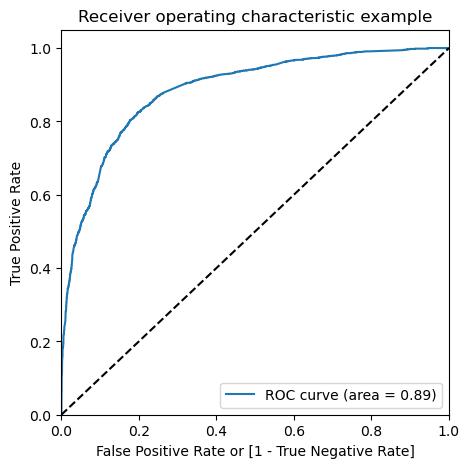

In [185]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_pro)

In [186]:
#Finding the optimal cutoff point
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_pro.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_pro,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.198825,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.126755,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.323505,9226,0,1,1,1,1,0,0,0,0,0,0
4750,1,0.865256,4750,1,1,1,1,1,1,1,1,1,1,0
7987,1,0.798088,7987,1,1,1,1,1,1,1,1,1,0,0


In [187]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.582900  0.973017  0.338540
0.2   0.2  0.746339  0.915372  0.640461
0.3   0.3  0.801291  0.849141  0.771319
0.4   0.4  0.816407  0.772281  0.844046
0.5   0.5  0.815147  0.702780  0.885531
0.6   0.6  0.797197  0.600164  0.920615
0.7   0.7  0.785231  0.528209  0.946223
0.8   0.8  0.759880  0.421504  0.971831
0.9   0.9  0.720202  0.293132  0.987708


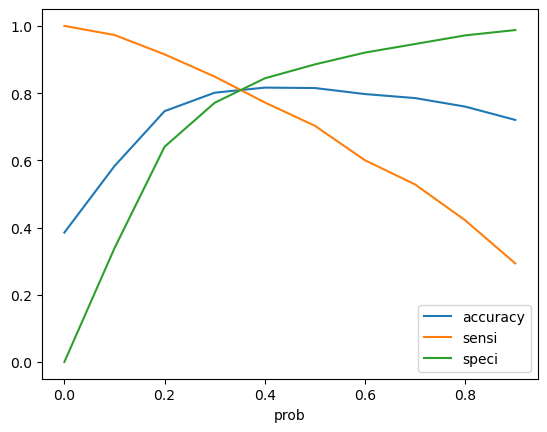

In [188]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [190]:
#Changing theoptimal cut off in trainset
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_pro.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_pro,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.198825,3009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.126755,1012,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.323505,9226,0,1,1,1,1,0,0,0,0,0,0,0
4750,1,0.865256,4750,1,1,1,1,1,1,1,1,1,1,0,1
7987,1,0.798088,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [192]:
#Assigning the lead score to training set
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_pro.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_pro,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
3009,0,0.198825,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1012,0,0.126755,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
9226,0,0.323505,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
4750,1,0.865256,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
7987,1,0.798088,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


In [193]:
#Finding the accuracy score of the model after changing the optimal cut off to 0.34
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print('Accuracy : ',accuracy*100)

Accuracy :  81.07384663832468


In [196]:
#Finding the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3147  758]
 [ 444 2002]]


In [198]:
#Finding the sensitivity and Specificity
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [199]:
sensitivity = TP/(TP+FN)
print('Sensitivity : ',sensitivity*100)

Sensitivity :  81.84791496320524


In [200]:
specificity = TN/(TN+FP)
print('Specificity : ',specificity*100)

Specificity :  80.58898847631242


#### Finding the precision and recall  score

In [201]:
#importing the necessary libraries
from sklearn.metrics import precision_score, recall_score

In [204]:
#Precision score
precision = precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)
print('Precision : ',precision*100)

Precision :  79.3628808864266


In [206]:
#Recall score
recall = recall_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)
print('Recall : ',recall*100)

Recall :  81.84791496320524


## Step 5 : Model Evaluation

#### Making the predictions on test dataset

In [207]:
#Scaling the test dataset for numerical values
X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website',
                                                            'Page Views Per Visit']])

In [208]:
#Assigning the model columns to X_test
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [209]:
#Adding the constant
X_test_sm = sm.add_constant(X_test)

In [210]:
#Making predictions on test dataset
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.132374
1490    0.969313
7936    0.114386
4216    0.804848
3830    0.134556
1800    0.638493
6507    0.342767
4821    0.305405
4223    0.915884
4714    0.323505
dtype: float64

In [211]:
#Converting to a data frame 
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
3271,0.132374
1490,0.969313
7936,0.114386
4216,0.804848
3830,0.134556


In [214]:
y_test.head()

3271    0
1490    1
7936    0
4216    1
3830    0
Name: Converted, dtype: int64

In [216]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [222]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [223]:
#Merging the two dataframes
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.132374
1,1,1490,0.969313
2,0,7936,0.114386
3,1,4216,0.804848
4,0,3830,0.134556


In [224]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [225]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.132374
1,1490,1,0.969313
2,7936,0,0.114386
3,4216,1,0.804848
4,3830,0,0.134556


In [226]:
#Finding the final predicted value 
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [227]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.132374,0
1,1490,1,0.969313,1
2,7936,0,0.114386,0
3,4216,1,0.804848,1
4,3830,0,0.134556,0


In [228]:
#Confusion Matrix
confusion1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion1)

[[1397  337]
 [ 194  795]]


In [229]:
#Accuracy score
accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted )
print('Accuracy : ',accuracy*100)

Accuracy :  80.49944913698127


In [230]:
TP = confusion1[1,1] # true positives 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [231]:
#Sensitivity of the test set
sensitivity = TP/(TP+FN)
print('Sensitivity : ',sensitivity*100)

Sensitivity :  80.38422649140546


In [232]:
#Specificity of the set
specificity = TN/(TN+FP)
print('Specificity : ',specificity*100)

Specificity :  80.56516724336792


In [233]:
# Assigning the lead score to test set
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.132374,0,13
1,1490,1,0.969313,1,97
2,7936,0,0.114386,0,11
3,4216,1,0.804848,1,80
4,3830,0,0.134556,0,13


In [234]:
#Precision and recall score
precision = precision_score(y_pred_final.Converted , y_pred_final.final_predicted)
print('Precision : ',precision*100) 

Precision :  70.22968197879858


In [235]:
recall = recall_score(y_pred_final.Converted , y_pred_final.final_predicted)
print('recall : ',recall*100)

recall :  80.38422649140546


#### Observations :